In [93]:
#load important libraries
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations
import numpy as np
import seaborn as sns

# Load the Data

In [94]:
#load the data

#load the users along with their interests
user_interest = pd.read_feather("data/user_interest")

#load the interests along with the word embeddings
interests_alone = pd.read_feather("data/interest_mapping")

#load the interests with occurance count and embeddings
interest_count = pd.read_feather("data/user_interest_embedding")

#load the dataset which contains the user information
user_df = pd.read_feather("data/user_df")

In [95]:
user_interest.head()

,USER_ID,INTEREST_ID,INTEREST_NAME,PROFILE_GENDER,PROFILE_SEARCH_GENDER,PROFILE_AGE,ABOUTME_TEXT,REGULAR_ACTIVE,BUSINESS_ACTIVE,CASUAL_ACTIVE,BFF_ACTIVE,SERIOUS_ACTIVE,AgeGroup,AgeLabel,MODE
0,1995045439,306,Singing,F,F,33,Meegan rhymes with vegan,0,0,0,1,0,1,25-34,BFF
1,1995045439,308,Crafts,F,F,33,Meegan rhymes with vegan,0,0,0,1,0,1,25-34,BFF
2,1995045439,421,Meditation,F,F,33,Meegan rhymes with vegan,0,0,0,1,0,1,25-34,BFF
3,1995045439,426,Swimming,F,F,33,Meegan rhymes with vegan,0,0,0,1,0,1,25-34,BFF
4,1995045439,506,Theatre,F,F,33,Meegan rhymes with vegan,0,0,0,1,0,1,25-34,BFF


In [96]:
interests_alone.head()

,INTEREST_ID,INTEREST_NAME,tokenized_interest,avg_embedding
0,306,Singing,[singing],"[0.10009765625, -0.039306640625, 0.07177734375..."
1,308,Crafts,[crafts],"[-0.006011962890625, -0.10400390625, -0.205078..."
2,421,Meditation,[meditation],"[0.251953125, 0.0458984375, 0.09716796875, 0.3..."
3,426,Swimming,[swimming],"[-0.1123046875, 0.2734375, 0.2255859375, 0.029..."
4,814,Documentaries,[documentaries],"[-0.20703125, 0.1572265625, 0.0002460479736328..."


In [97]:
interest_count.head()

,INTEREST_ID,INTEREST_NAME_x,OCCURENCE_FREQUENCY,OCCURANCE_PERCENTAGE,RANKING,tokenized_interest,avg_embedding,check_embd
0,301,Art,413,2.947474,1,[art],"[0.0233154296875, -0.06396484375, 0.0055236816...",False
1,504,Museums & galleries,408,2.911790,2,"[museums, galleries]","[0.16845703125, 0.12109375, -0.0048828125, 0.3...",False
2,508,Pubs,345,2.462175,3,[pubs],"[0.140625, -0.03857421875, 0.1328125, 0.503906...",False
3,501,Gigs,342,2.440765,4,[gigs],"[0.29296875, 0.053466796875, -0.314453125, 0.2...",False
4,304,Photography,304,2.169569,5,[photography],"[0.00180816650390625, 0.056396484375, -0.08300...",False


In [99]:
user_df.head()

,USER_ID,PROFILE_GENDER,PROFILE_SEARCH_GENDER,PROFILE_AGE,ABOUTME_TEXT,MODE,AgeLabel
0,1995045439,F,F,33,Meegan rhymes with vegan,BFF,25-34
1,2322567316,F,F,37,Just recently moved to London from Manchester....,BFF,35-44
2,2172933118,F,F,26,Fun and always exciting,BFF,25-34
3,829344741,M,M,26,🇦🇺/🇩🇪 mash looking for someone to have Sunday ...,BFF,25-34
4,3707681996,F,F,43,"Must love dogs. New Yorker living in London, a...",BFF,35-44


In [98]:
#make a dictionary which we could use as a hash table later on for the weighted cosine similarity
interest_id = interest_count['INTEREST_ID'].to_list()
occurance_freq = interest_count['OCCURENCE_FREQUENCY'].to_list()

interest_dict = dict(zip(interest_id, occurance_freq))

# Create a Dataset

In [37]:
user_interest.head()

,USER_ID,INTEREST_ID,INTEREST_NAME,PROFILE_GENDER,PROFILE_SEARCH_GENDER,PROFILE_AGE,ABOUTME_TEXT,REGULAR_ACTIVE,BUSINESS_ACTIVE,CASUAL_ACTIVE,BFF_ACTIVE,SERIOUS_ACTIVE,AgeGroup,AgeLabel,MODE
0,1995045439,306,Singing,F,F,33,Meegan rhymes with vegan,0,0,0,1,0,1,25-34,BFF
1,1995045439,308,Crafts,F,F,33,Meegan rhymes with vegan,0,0,0,1,0,1,25-34,BFF
2,1995045439,421,Meditation,F,F,33,Meegan rhymes with vegan,0,0,0,1,0,1,25-34,BFF
3,1995045439,426,Swimming,F,F,33,Meegan rhymes with vegan,0,0,0,1,0,1,25-34,BFF
4,1995045439,506,Theatre,F,F,33,Meegan rhymes with vegan,0,0,0,1,0,1,25-34,BFF


In [38]:
#get all possible pairs of IDs of users
user_ids = user_interest['USER_ID'].unique()
user_id_pairs = list(combinations(user_ids, 2))

all_pairs = pd.DataFrame(user_id_pairs, columns=['User_ID_1', 'User_ID_2'])
all_pairs.head()

,User_ID_1,User_ID_2
0,1995045439,2322567316
1,1995045439,2172933118
2,1995045439,829344741
3,1995045439,3707681996
4,1995045439,3595059980


In [39]:
#include the word2vec representation and user gender in this table
user_interest = user_interest.merge(interest_count[['INTEREST_ID','avg_embedding']], on='INTEREST_ID', how='inner')
user_interest.head()

,USER_ID,INTEREST_ID,INTEREST_NAME,PROFILE_GENDER,PROFILE_SEARCH_GENDER,PROFILE_AGE,ABOUTME_TEXT,REGULAR_ACTIVE,BUSINESS_ACTIVE,CASUAL_ACTIVE,BFF_ACTIVE,SERIOUS_ACTIVE,AgeGroup,AgeLabel,MODE,avg_embedding
0,1995045439,306,Singing,F,F,33,Meegan rhymes with vegan,0,0,0,1,0,1,25-34,BFF,"[0.10009765625, -0.039306640625, 0.07177734375..."
1,1496250524,306,Singing,F,F,28,Paulina is actually my middle name (blame Face...,0,0,0,1,0,1,25-34,BFF,"[0.10009765625, -0.039306640625, 0.07177734375..."
2,1568975055,306,Singing,M,M,32,Just a tech man with a few words,0,0,0,1,0,1,25-34,BFF,"[0.10009765625, -0.039306640625, 0.07177734375..."
3,1568975055,306,Singing,M,M,32,Just a tech man with a few words,0,0,0,1,0,1,25-34,BFF,"[0.10009765625, -0.039306640625, 0.07177734375..."
4,2618325420,306,Singing,F,F,27,Only looking for friends at the moment! I am q...,0,0,0,1,0,1,25-34,BFF,"[0.10009765625, -0.039306640625, 0.07177734375..."


In [40]:
#modify the dataset such that we get the set of interests as a list grouped by the profile user id
user_set_interests  = user_interest.groupby(['USER_ID', 'PROFILE_GENDER', 'PROFILE_AGE', 'MODE']).agg({
    'INTEREST_ID': list,
    'avg_embedding': list
}).reset_index()

# Rename the column to 'set_interests'
user_set_interests = user_set_interests.rename(columns={'INTEREST_ID': 'set_interests', 'avg_embedding': 'set_avg_embedding'})
user_set_interests.head()

,USER_ID,PROFILE_GENDER,PROFILE_AGE,MODE,set_interests,set_avg_embedding
0,2116134,F,43,BFF,"[1107, 1709, 504, 307, 1205, 502, 2418, 1807, ...","[[-0.1953125, -0.1328125, 0.26953125, 0.474609..."
1,2960327,M,27,DATING,"[1418, 301, 515, 1118, 808]","[[0.17220052083333334, -0.004384358723958333, ..."
2,12489204,M,37,BOTH,"[1116, 1901, 407, 2401, 2502, 1510, 2303]","[[-0.0634765625, 0.03466796875, 0.212890625, 0..."
3,14577829,F,43,DATING,"[502, 304, 1209, 1208, 422]","[[0.04937744140625, 0.01959228515625, 0.119873..."
4,21083703,F,30,BOTH,"[501, 1116, 2504, 2301, 1129, 1805, 2001]","[[0.29296875, 0.053466796875, -0.314453125, 0...."


In [41]:
#merge the user_pairs with the user set interest data
all_pairs = all_pairs.merge(user_set_interests, left_on = 'User_ID_1', right_on = 'USER_ID',  how = 'inner')
all_pairs = all_pairs.merge(user_set_interests, left_on = 'User_ID_2', right_on = 'USER_ID',  how = 'inner')

# Rename some of the columns
all_pairs = all_pairs.rename(columns={'set_interests_x': 'set_interests_1', 'set_avg_embedding_x': 'set_avg_embedding_1', 'set_interests_y': 'set_interests_2', 'set_avg_embedding_y': 'set_avg_embedding_2',
                                     'PROFILE_GENDER_x': 'PROFILE_GENDER_1', 'PROFILE_GENDER_y': 'PROFILE_GENDER_2',
                                     'PROFILE_AGE_x': 'PROFILE_AGE_1', 'PROFILE_AGE_y': 'PROFILE_AGE_2',
                                     'MODE_x': 'MODE_1', 'MODE_y': 'MODE_2'})

#Drop some of the columns
all_pairs = all_pairs.drop('USER_ID_x', axis=1)
all_pairs = all_pairs.drop('USER_ID_y', axis=1)

all_pairs.head()

,User_ID_1,User_ID_2,PROFILE_GENDER_1,PROFILE_AGE_1,MODE_1,set_interests_1,set_avg_embedding_1,PROFILE_GENDER_2,PROFILE_AGE_2,MODE_2,set_interests_2,set_avg_embedding_2
0,1995045439,2322567316,F,33,BFF,"[306, 308, 421, 426, 814, 918, 1103, 1107, 120...","[[0.10009765625, -0.039306640625, 0.0717773437...",F,37,BFF,"[421, 402, 501, 503, 503, 504, 508, 1116, 1901...","[[0.251953125, 0.0458984375, 0.09716796875, 0...."
1,1995045439,2172933118,F,33,BFF,"[306, 308, 421, 426, 814, 918, 1103, 1107, 120...","[[0.10009765625, -0.039306640625, 0.0717773437...",F,26,BFF,"[503, 504, 508, 1901, 301, 301, 307, 407, 507,...","[[0.181640625, 0.205078125, -0.07177734375, 0...."
2,2322567316,2172933118,F,37,BFF,"[421, 402, 501, 503, 503, 504, 508, 1116, 1901...","[[0.251953125, 0.0458984375, 0.09716796875, 0....",F,26,BFF,"[503, 504, 508, 1901, 301, 301, 307, 407, 507,...","[[0.181640625, 0.205078125, -0.07177734375, 0...."
3,1995045439,829344741,F,33,BFF,"[306, 308, 421, 426, 814, 918, 1103, 1107, 120...","[[0.10009765625, -0.039306640625, 0.0717773437...",M,26,BFF,"[508, 1901, 2403, 1205, 1301, 1301, 1701, 2504...","[[0.140625, -0.03857421875, 0.1328125, 0.50390..."
4,2322567316,829344741,F,37,BFF,"[421, 402, 501, 503, 503, 504, 508, 1116, 1901...","[[0.251953125, 0.0458984375, 0.09716796875, 0....",M,26,BFF,"[508, 1901, 2403, 1205, 1301, 1301, 1701, 2504...","[[0.140625, -0.03857421875, 0.1328125, 0.50390..."


In [42]:
%%time

all_pairs['avg_interest_embeddings_1'] = all_pairs.apply(lambda x: np.mean(x.set_avg_embedding_1, axis = 0), axis = 1)
all_pairs['avg_interest_embeddings_2'] = all_pairs.apply(lambda x: np.mean(x.set_avg_embedding_2, axis = 0), axis = 1)

all_pairs.head()

CPU times: user 2min 29s, sys: 6.08 s, total: 2min 35s
Wall time: 2min 36s


,User_ID_1,User_ID_2,PROFILE_GENDER_1,PROFILE_AGE_1,MODE_1,set_interests_1,set_avg_embedding_1,PROFILE_GENDER_2,PROFILE_AGE_2,MODE_2,set_interests_2,set_avg_embedding_2,avg_interest_embeddings_1,avg_interest_embeddings_2
0,1995045439,2322567316,F,33,BFF,"[306, 308, 421, 426, 814, 918, 1103, 1107, 120...","[[0.10009765625, -0.039306640625, 0.0717773437...",F,37,BFF,"[421, 402, 501, 503, 503, 504, 508, 1116, 1901...","[[0.251953125, 0.0458984375, 0.09716796875, 0....","[0.03827222188313802, 0.02514461676279704, -0....","[0.12387547348484848, 0.07419655539772728, 0.0..."
1,1995045439,2172933118,F,33,BFF,"[306, 308, 421, 426, 814, 918, 1103, 1107, 120...","[[0.10009765625, -0.039306640625, 0.0717773437...",F,26,BFF,"[503, 504, 508, 1901, 301, 301, 307, 407, 507,...","[[0.181640625, 0.205078125, -0.07177734375, 0....","[0.03827222188313802, 0.02514461676279704, -0....","[0.016571344113817405, 0.007537243412990195, 0..."
2,2322567316,2172933118,F,37,BFF,"[421, 402, 501, 503, 503, 504, 508, 1116, 1901...","[[0.251953125, 0.0458984375, 0.09716796875, 0....",F,26,BFF,"[503, 504, 508, 1901, 301, 301, 307, 407, 507,...","[[0.181640625, 0.205078125, -0.07177734375, 0....","[0.12387547348484848, 0.07419655539772728, 0.0...","[0.016571344113817405, 0.007537243412990195, 0..."
3,1995045439,829344741,F,33,BFF,"[306, 308, 421, 426, 814, 918, 1103, 1107, 120...","[[0.10009765625, -0.039306640625, 0.0717773437...",M,26,BFF,"[508, 1901, 2403, 1205, 1301, 1301, 1701, 2504...","[[0.140625, -0.03857421875, 0.1328125, 0.50390...","[0.03827222188313802, 0.02514461676279704, -0....","[0.027635231996193912, 0.007846930088141024, -..."
4,2322567316,829344741,F,37,BFF,"[421, 402, 501, 503, 503, 504, 508, 1116, 1901...","[[0.251953125, 0.0458984375, 0.09716796875, 0....",M,26,BFF,"[508, 1901, 2403, 1205, 1301, 1301, 1701, 2504...","[[0.140625, -0.03857421875, 0.1328125, 0.50390...","[0.12387547348484848, 0.07419655539772728, 0.0...","[0.027635231996193912, 0.007846930088141024, -..."


In [43]:
#filtered_df = all_pairs[all_pairs['set_avg_embedding_1'].apply(lambda x: isinstance(x, float))]
#filtered_df.head()

In [44]:
%%time

# Calculate the cosine similarity between all pairs of interests and save the combinations of each interest pair
all_pairs[['pair_cosine', 'interest_pairs']] = all_pairs.apply(lambda x: pd.Series(pairwise_cosine_similarity(x['set_avg_embedding_1'], x['set_avg_embedding_2'], x['set_interests_1'], x['set_interests_2'])), axis=1)

CPU times: user 32min 16s, sys: 16.4 s, total: 32min 33s
Wall time: 32min 44s


In [45]:
# Create a new column based on gender combinations
all_pairs['GENDER_COMBINATION'] = np.where(
    (all_pairs['PROFILE_GENDER_1'] == 'M') & (all_pairs['PROFILE_GENDER_2'] == 'M'), 'M-M',
    np.where((all_pairs['PROFILE_GENDER_1'] == 'F') & (all_pairs['PROFILE_GENDER_2'] == 'F'), 'F-F', 'F-M')
)

In [46]:
# Create a new column based on mode combinations
all_pairs['MODE_COMBINATION'] = all_pairs['MODE_1'] + '-' + all_pairs['MODE_2']

In [47]:
#distance betweem pairs' age
all_pairs['age_difference'] = abs(all_pairs['PROFILE_AGE_1'] - all_pairs['PROFILE_AGE_2'])

In [48]:
all_pairs.head()

,User_ID_1,User_ID_2,PROFILE_GENDER_1,PROFILE_AGE_1,MODE_1,set_interests_1,set_avg_embedding_1,PROFILE_GENDER_2,PROFILE_AGE_2,MODE_2,set_interests_2,set_avg_embedding_2,avg_interest_embeddings_1,avg_interest_embeddings_2,pair_cosine,interest_pairs,GENDER_COMBINATION,MODE_COMBINATION,age_difference
0,1995045439,2322567316,F,33,BFF,"[306, 308, 421, 426, 814, 918, 1103, 1107, 120...","[[0.10009765625, -0.039306640625, 0.0717773437...",F,37,BFF,"[421, 402, 501, 503, 503, 504, 508, 1116, 1901...","[[0.251953125, 0.0458984375, 0.09716796875, 0....","[0.03827222188313802, 0.02514461676279704, -0....","[0.12387547348484848, 0.07419655539772728, 0.0...","[0.27290779436959883, 0.2659737405990467, 0.32...","[[306, 421], [306, 402], [306, 501], [306, 503...",F-F,BFF-BFF,4
1,1995045439,2172933118,F,33,BFF,"[306, 308, 421, 426, 814, 918, 1103, 1107, 120...","[[0.10009765625, -0.039306640625, 0.0717773437...",F,26,BFF,"[503, 504, 508, 1901, 301, 301, 307, 407, 507,...","[[0.181640625, 0.205078125, -0.07177734375, 0....","[0.03827222188313802, 0.02514461676279704, -0....","[0.016571344113817405, 0.007537243412990195, 0...","[0.16202750331805338, 0.03944404006949651, 0.1...","[[306, 503], [306, 504], [306, 508], [306, 190...",F-F,BFF-BFF,7
2,2322567316,2172933118,F,37,BFF,"[421, 402, 501, 503, 503, 504, 508, 1116, 1901...","[[0.251953125, 0.0458984375, 0.09716796875, 0....",F,26,BFF,"[503, 504, 508, 1901, 301, 301, 307, 407, 507,...","[[0.181640625, 0.205078125, -0.07177734375, 0....","[0.12387547348484848, 0.07419655539772728, 0.0...","[0.016571344113817405, 0.007537243412990195, 0...","[0.14340351598397041, 0.17275148803134585, 0.0...","[[421, 503], [421, 504], [421, 508], [421, 190...",F-F,BFF-BFF,11
3,1995045439,829344741,F,33,BFF,"[306, 308, 421, 426, 814, 918, 1103, 1107, 120...","[[0.10009765625, -0.039306640625, 0.0717773437...",M,26,BFF,"[508, 1901, 2403, 1205, 1301, 1301, 1701, 2504...","[[0.140625, -0.03857421875, 0.1328125, 0.50390...","[0.03827222188313802, 0.02514461676279704, -0....","[0.027635231996193912, 0.007846930088141024, -...","[0.13726965717086229, 0.13989540020216418, 0.1...","[[306, 508], [306, 1901], [306, 2403], [306, 1...",F-M,BFF-BFF,7
4,2322567316,829344741,F,37,BFF,"[421, 402, 501, 503, 503, 504, 508, 1116, 1901...","[[0.251953125, 0.0458984375, 0.09716796875, 0....",M,26,BFF,"[508, 1901, 2403, 1205, 1301, 1301, 1701, 2504...","[[0.140625, -0.03857421875, 0.1328125, 0.50390...","[0.12387547348484848, 0.07419655539772728, 0.0...","[0.027635231996193912, 0.007846930088141024, -...","[0.06391076129781047, 0.08890402740437718, 0.2...","[[421, 508], [421, 1901], [421, 2403], [421, 1...",F-M,BFF-BFF,11


In [ ]:
#save as a heather file
#all_pairs.to_feather("data/processed_data")

# Calculating Interest Similarity

In [49]:
#calculate the simple binary similarity between user pairs
all_pairs['simple_binary_similarity'] = all_pairs.apply(lambda x: simple_binary_similarity(x.set_interests_1, x.set_interests_2), axis=1)
all_pairs.head()

,User_ID_1,User_ID_2,PROFILE_GENDER_1,PROFILE_AGE_1,MODE_1,set_interests_1,set_avg_embedding_1,PROFILE_GENDER_2,PROFILE_AGE_2,MODE_2,set_interests_2,set_avg_embedding_2,avg_interest_embeddings_1,avg_interest_embeddings_2,pair_cosine,interest_pairs,GENDER_COMBINATION,MODE_COMBINATION,age_difference,simple_binary_similarity
0,1995045439,2322567316,F,33,BFF,"[306, 308, 421, 426, 814, 918, 1103, 1107, 120...","[[0.10009765625, -0.039306640625, 0.0717773437...",F,37,BFF,"[421, 402, 501, 503, 503, 504, 508, 1116, 1901...","[[0.251953125, 0.0458984375, 0.09716796875, 0....","[0.03827222188313802, 0.02514461676279704, -0....","[0.12387547348484848, 0.07419655539772728, 0.0...","[0.27290779436959883, 0.2659737405990467, 0.32...","[[306, 421], [306, 402], [306, 501], [306, 503...",F-F,BFF-BFF,4,True
1,1995045439,2172933118,F,33,BFF,"[306, 308, 421, 426, 814, 918, 1103, 1107, 120...","[[0.10009765625, -0.039306640625, 0.0717773437...",F,26,BFF,"[503, 504, 508, 1901, 301, 301, 307, 407, 507,...","[[0.181640625, 0.205078125, -0.07177734375, 0....","[0.03827222188313802, 0.02514461676279704, -0....","[0.016571344113817405, 0.007537243412990195, 0...","[0.16202750331805338, 0.03944404006949651, 0.1...","[[306, 503], [306, 504], [306, 508], [306, 190...",F-F,BFF-BFF,7,False
2,2322567316,2172933118,F,37,BFF,"[421, 402, 501, 503, 503, 504, 508, 1116, 1901...","[[0.251953125, 0.0458984375, 0.09716796875, 0....",F,26,BFF,"[503, 504, 508, 1901, 301, 301, 307, 407, 507,...","[[0.181640625, 0.205078125, -0.07177734375, 0....","[0.12387547348484848, 0.07419655539772728, 0.0...","[0.016571344113817405, 0.007537243412990195, 0...","[0.14340351598397041, 0.17275148803134585, 0.0...","[[421, 503], [421, 504], [421, 508], [421, 190...",F-F,BFF-BFF,11,True
3,1995045439,829344741,F,33,BFF,"[306, 308, 421, 426, 814, 918, 1103, 1107, 120...","[[0.10009765625, -0.039306640625, 0.0717773437...",M,26,BFF,"[508, 1901, 2403, 1205, 1301, 1301, 1701, 2504...","[[0.140625, -0.03857421875, 0.1328125, 0.50390...","[0.03827222188313802, 0.02514461676279704, -0....","[0.027635231996193912, 0.007846930088141024, -...","[0.13726965717086229, 0.13989540020216418, 0.1...","[[306, 508], [306, 1901], [306, 2403], [306, 1...",F-M,BFF-BFF,7,False
4,2322567316,829344741,F,37,BFF,"[421, 402, 501, 503, 503, 504, 508, 1116, 1901...","[[0.251953125, 0.0458984375, 0.09716796875, 0....",M,26,BFF,"[508, 1901, 2403, 1205, 1301, 1301, 1701, 2504...","[[0.140625, -0.03857421875, 0.1328125, 0.50390...","[0.12387547348484848, 0.07419655539772728, 0.0...","[0.027635231996193912, 0.007846930088141024, -...","[0.06391076129781047, 0.08890402740437718, 0.2...","[[421, 508], [421, 1901], [421, 2403], [421, 1...",F-M,BFF-BFF,11,True


In [50]:
%%time

#calculate the binary threshold embedding similarity
all_pairs['binary_threshold_embedding_similarity'] = all_pairs.apply(lambda x: binary_embedding_similarity(x.pair_cosine, x.interest_pairs), axis = 1)
all_pairs.head()

CPU times: user 23.2 s, sys: 184 ms, total: 23.4 s
Wall time: 23.5 s


,User_ID_1,User_ID_2,PROFILE_GENDER_1,PROFILE_AGE_1,MODE_1,set_interests_1,set_avg_embedding_1,PROFILE_GENDER_2,PROFILE_AGE_2,MODE_2,...,set_avg_embedding_2,avg_interest_embeddings_1,avg_interest_embeddings_2,pair_cosine,interest_pairs,GENDER_COMBINATION,MODE_COMBINATION,age_difference,simple_binary_similarity,binary_threshold_embedding_similarity
0,1995045439,2322567316,F,33,BFF,"[306, 308, 421, 426, 814, 918, 1103, 1107, 120...","[[0.10009765625, -0.039306640625, 0.0717773437...",F,37,BFF,...,"[[0.251953125, 0.0458984375, 0.09716796875, 0....","[0.03827222188313802, 0.02514461676279704, -0....","[0.12387547348484848, 0.07419655539772728, 0.0...","[0.27290779436959883, 0.2659737405990467, 0.32...","[[306, 421], [306, 402], [306, 501], [306, 503...",F-F,BFF-BFF,4,True,1
1,1995045439,2172933118,F,33,BFF,"[306, 308, 421, 426, 814, 918, 1103, 1107, 120...","[[0.10009765625, -0.039306640625, 0.0717773437...",F,26,BFF,...,"[[0.181640625, 0.205078125, -0.07177734375, 0....","[0.03827222188313802, 0.02514461676279704, -0....","[0.016571344113817405, 0.007537243412990195, 0...","[0.16202750331805338, 0.03944404006949651, 0.1...","[[306, 503], [306, 504], [306, 508], [306, 190...",F-F,BFF-BFF,7,False,1
2,2322567316,2172933118,F,37,BFF,"[421, 402, 501, 503, 503, 504, 508, 1116, 1901...","[[0.251953125, 0.0458984375, 0.09716796875, 0....",F,26,BFF,...,"[[0.181640625, 0.205078125, -0.07177734375, 0....","[0.12387547348484848, 0.07419655539772728, 0.0...","[0.016571344113817405, 0.007537243412990195, 0...","[0.14340351598397041, 0.17275148803134585, 0.0...","[[421, 503], [421, 504], [421, 508], [421, 190...",F-F,BFF-BFF,11,True,1
3,1995045439,829344741,F,33,BFF,"[306, 308, 421, 426, 814, 918, 1103, 1107, 120...","[[0.10009765625, -0.039306640625, 0.0717773437...",M,26,BFF,...,"[[0.140625, -0.03857421875, 0.1328125, 0.50390...","[0.03827222188313802, 0.02514461676279704, -0....","[0.027635231996193912, 0.007846930088141024, -...","[0.13726965717086229, 0.13989540020216418, 0.1...","[[306, 508], [306, 1901], [306, 2403], [306, 1...",F-M,BFF-BFF,7,False,0
4,2322567316,829344741,F,37,BFF,"[421, 402, 501, 503, 503, 504, 508, 1116, 1901...","[[0.251953125, 0.0458984375, 0.09716796875, 0....",M,26,BFF,...,"[[0.140625, -0.03857421875, 0.1328125, 0.50390...","[0.12387547348484848, 0.07419655539772728, 0.0...","[0.027635231996193912, 0.007846930088141024, -...","[0.06391076129781047, 0.08890402740437718, 0.2...","[[421, 508], [421, 1901], [421, 2403], [421, 1...",F-M,BFF-BFF,11,True,1


In [51]:
all_pairs[(all_pairs['binary_threshold_embedding_similarity'] == 1) & (all_pairs['simple_binary_similarity'] == False)]

,User_ID_1,User_ID_2,PROFILE_GENDER_1,PROFILE_AGE_1,MODE_1,set_interests_1,set_avg_embedding_1,PROFILE_GENDER_2,PROFILE_AGE_2,MODE_2,...,set_avg_embedding_2,avg_interest_embeddings_1,avg_interest_embeddings_2,pair_cosine,interest_pairs,GENDER_COMBINATION,MODE_COMBINATION,age_difference,simple_binary_similarity,binary_threshold_embedding_similarity
1,1995045439,2172933118,F,33,BFF,"[306, 308, 421, 426, 814, 918, 1103, 1107, 120...","[[0.10009765625, -0.039306640625, 0.0717773437...",F,26,BFF,...,"[[0.181640625, 0.205078125, -0.07177734375, 0....","[0.03827222188313802, 0.02514461676279704, -0....","[0.016571344113817405, 0.007537243412990195, 0...","[0.16202750331805338, 0.03944404006949651, 0.1...","[[306, 503], [306, 504], [306, 508], [306, 190...",F-F,BFF-BFF,7,False,1
15,1995045439,4262535431,F,33,BFF,"[306, 308, 421, 426, 814, 918, 1103, 1107, 120...","[[0.10009765625, -0.039306640625, 0.0717773437...",M,26,BFF,...,"[[0.048095703125, 0.1943359375, -0.03637695312...","[0.03827222188313802, 0.02514461676279704, -0....","[0.028944651285807296, -0.054931640625, -0.012...","[0.13989540020216418, 0.10654734662950735, 0.6...","[[306, 1901], [306, 2104], [306, 307], [306, 5...",F-M,BFF-BFF,7,False,1
33,3595059980,1496250524,M,30,BFF,"[1901, 1702, 2504, 1003, 802, 1807, 2402, 2506]","[[0.048095703125, 0.1943359375, -0.03637695312...",F,28,BFF,...,"[[0.10009765625, -0.039306640625, 0.0717773437...","[-0.03178596496582031, 0.0100860595703125, -0....","[-0.000751749674479163, 0.0093353271484375, -0...","[0.13989540020216418, 0.19658714642402464, 0.1...","[[1901, 306], [1901, 1418], [1901, 501], [1901...",F-M,BFF-BFF,2,False,1
34,4262535431,1496250524,M,26,BFF,"[1901, 2104, 307, 507, 1003, 807, 2004, 2501]","[[0.048095703125, 0.1943359375, -0.03637695312...",F,28,BFF,...,"[[0.10009765625, -0.039306640625, 0.0717773437...","[0.028944651285807296, -0.054931640625, -0.012...","[-0.000751749674479163, 0.0093353271484375, -0...","[0.13989540020216418, 0.19658714642402464, 0.1...","[[1901, 306], [1901, 1418], [1901, 501], [1901...",F-M,BFF-BFF,2,False,1
46,2322567316,547641678,F,37,BFF,"[421, 402, 501, 503, 503, 504, 508, 1116, 1901...","[[0.251953125, 0.0458984375, 0.09716796875, 0....",M,29,BFF,...,"[[0.0233154296875, -0.06396484375, 0.005523681...","[0.12387547348484848, 0.07419655539772728, 0.0...","[-0.0395263671875, -0.02138671875, 0.009649658...","[0.34543599413273834, 0.08897120078866944, 0.2...","[[421, 301], [421, 507], [421, 404], [421, 111...",F-M,BFF-BFF,8,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1124206,1621862813,789424677,F,26,BOTH,"[308, 1709, 504, 2104, 1205, 502, 502, 2506, 8...","[[-0.006011962890625, -0.10400390625, -0.20507...",F,24,BOTH,...,"[[0.0233154296875, -0.06396484375, 0.005523681...","[9.240044487847838e-06, 0.0461181640625, 0.035...","[0.011011081271701391, -0.05004848904079861, -...","[0.3628602648935464, 0.3628602648935464, 0.354...","[[308, 301], [308, 301], [308, 307], [308, 507...",F-F,BOTH-BOTH,2,False,1
1124210,2058683239,789424677,M,26,BOTH,"[1709, 504, 504, 1901, 2403, 404, 2502, 2501, ...","[[-0.038330078125, 0.060791015625, 0.121154785...",F,24,BOTH,...,"[[0.0233154296875, -0.06396484375, 0.005523681...","[-0.03665865384615385, 0.05180006760817308, -0...","[0.011011081271701391, -0.05004848904079861, -...","[0.10136330502819561, 0.10136330502819561, 0.0...","[[1709, 301], [1709, 301], [1709, 307], [1709,...",F-M,BOTH-BOTH,2,False,1
1124219,4068718862,789424677,M,28,BOTH,"[508, 502, 1302, 1202, 808, 417]","[[0.140625, -0.03857421875, 0.1328125, 0.50390...",F,24,BOTH,...,"[[0.0233154296875, -0.06396484375, 0.005523681...","[-0.004587809244791667, -0.0071563720703125, 0...","[0.011011081271701391, -0.05004848904079861, -...","[0.05663358508128355, 0.05663358508128355, 0.2...","[[508, 301], [508, 301], [508, 307], [508, 507...",F-M,BOTH-BOTH,4,False,1
1124226,2695142269,789424677,M,24,BOTH,"[501, 304, 2501, 1204, 427, 419, 2415, 1006, 3...","[[0.292

In [52]:
#calculate the simple cosine similarity score between pair of users
all_pairs['simple_cosine_similarity'] = all_pairs.apply(lambda x: simple_cosine_similarity(x.set_interests_1, x.set_interests_2), axis=1)
all_pairs.head()

,User_ID_1,User_ID_2,PROFILE_GENDER_1,PROFILE_AGE_1,MODE_1,set_interests_1,set_avg_embedding_1,PROFILE_GENDER_2,PROFILE_AGE_2,MODE_2,...,avg_interest_embeddings_1,avg_interest_embeddings_2,pair_cosine,interest_pairs,GENDER_COMBINATION,MODE_COMBINATION,age_difference,simple_binary_similarity,binary_threshold_embedding_similarity,simple_cosine_similarity
0,1995045439,2322567316,F,33,BFF,"[306, 308, 421, 426, 814, 918, 1103, 1107, 120...","[[0.10009765625, -0.039306640625, 0.0717773437...",F,37,BFF,...,"[0.03827222188313802, 0.02514461676279704, -0....","[0.12387547348484848, 0.07419655539772728, 0.0...","[0.27290779436959883, 0.2659737405990467, 0.32...","[[306, 421], [306, 402], [306, 501], [306, 503...",F-F,BFF-BFF,4,True,1,0.075378
1,1995045439,2172933118,F,33,BFF,"[306, 308, 421, 426, 814, 918, 1103, 1107, 120...","[[0.10009765625, -0.039306640625, 0.0717773437...",F,26,BFF,...,"[0.03827222188313802, 0.02514461676279704, -0....","[0.016571344113817405, 0.007537243412990195, 0...","[0.16202750331805338, 0.03944404006949651, 0.1...","[[306, 503], [306, 504], [306, 508], [306, 190...",F-F,BFF-BFF,7,False,1,0.000000
2,2322567316,2172933118,F,37,BFF,"[421, 402, 501, 503, 503, 504, 508, 1116, 1901...","[[0.251953125, 0.0458984375, 0.09716796875, 0....",F,26,BFF,...,"[0.12387547348484848, 0.07419655539772728, 0.0...","[0.016571344113817405, 0.007537243412990195, 0...","[0.14340351598397041, 0.17275148803134585, 0.0...","[[421, 503], [421, 504], [421, 508], [421, 190...",F-F,BFF-BFF,11,True,1,0.292509
3,1995045439,829344741,F,33,BFF,"[306, 308, 421, 426, 814, 918, 1103, 1107, 120...","[[0.10009765625, -0.039306640625, 0.0717773437...",M,26,BFF,...,"[0.03827222188313802, 0.02514461676279704, -0....","[0.027635231996193912, 0.007846930088141024, -...","[0.13726965717086229, 0.13989540020216418, 0.1...","[[306, 508], [306, 1901], [306, 2403], [306, 1...",F-M,BFF-BFF,7,False,0,0.000000
4,2322567316,829344741,F,37,BFF,"[421, 402, 501, 503, 503, 504, 508, 1116, 1901...","[[0.251953125, 0.0458984375, 0.09716796875, 0....",M,26,BFF,...,"[0.12387547348484848, 0.07419655539772728, 0.0...","[0.027635231996193912, 0.007846930088141024, -...","[0.06391076129781047, 0.08890402740437718, 0.2...","[[421, 508], [421, 1901], [421, 2403], [421, 1...",F-M,BFF-BFF,11,True,1,0.250873


In [53]:
#calculate the simple weighted cosine similarity score between pair of users
all_pairs['simple_weighted_cosine_similarity'] = all_pairs.apply(lambda x: simple_weighted_cosine_similarity(x.set_interests_1, x.set_interests_2, interest_dict), axis=1)
all_pairs.head()

,User_ID_1,User_ID_2,PROFILE_GENDER_1,PROFILE_AGE_1,MODE_1,set_interests_1,set_avg_embedding_1,PROFILE_GENDER_2,PROFILE_AGE_2,MODE_2,...,avg_interest_embeddings_2,pair_cosine,interest_pairs,GENDER_COMBINATION,MODE_COMBINATION,age_difference,simple_binary_similarity,binary_threshold_embedding_similarity,simple_cosine_similarity,simple_weighted_cosine_similarity
0,1995045439,2322567316,F,33,BFF,"[306, 308, 421, 426, 814, 918, 1103, 1107, 120...","[[0.10009765625, -0.039306640625, 0.0717773437...",F,37,BFF,...,"[0.12387547348484848, 0.07419655539772728, 0.0...","[0.27290779436959883, 0.2659737405990467, 0.32...","[[306, 421], [306, 402], [306, 501], [306, 503...",F-F,BFF-BFF,4,True,1,0.075378,0.021951
1,1995045439,2172933118,F,33,BFF,"[306, 308, 421, 426, 814, 918, 1103, 1107, 120...","[[0.10009765625, -0.039306640625, 0.0717773437...",F,26,BFF,...,"[0.016571344113817405, 0.007537243412990195, 0...","[0.16202750331805338, 0.03944404006949651, 0.1...","[[306, 503], [306, 504], [306, 508], [306, 190...",F-F,BFF-BFF,7,False,1,0.000000,0.000000
2,2322567316,2172933118,F,37,BFF,"[421, 402, 501, 503, 503, 504, 508, 1116, 1901...","[[0.251953125, 0.0458984375, 0.09716796875, 0....",F,26,BFF,...,"[0.016571344113817405, 0.007537243412990195, 0...","[0.14340351598397041, 0.17275148803134585, 0.0...","[[421, 503], [421, 504], [421, 508], [421, 190...",F-F,BFF-BFF,11,True,1,0.292509,0.052183
3,1995045439,829344741,F,33,BFF,"[306, 308, 421, 426, 814, 918, 1103, 1107, 120...","[[0.10009765625, -0.039306640625, 0.0717773437...",M,26,BFF,...,"[0.027635231996193912, 0.007846930088141024, -...","[0.13726965717086229, 0.13989540020216418, 0.1...","[[306, 508], [306, 1901], [306, 2403], [306, 1...",F-M,BFF-BFF,7,False,0,0.000000,0.000000
4,2322567316,829344741,F,37,BFF,"[421, 402, 501, 503, 503, 504, 508, 1116, 1901...","[[0.251953125, 0.0458984375, 0.09716796875, 0....",M,26,BFF,...,"[0.027635231996193912, 0.007846930088141024, -...","[0.06391076129781047, 0.08890402740437718, 0.2...","[[421, 508], [421, 1901], [421, 2403], [421, 1...",F-M,BFF-BFF,11,True,1,0.250873,0.047064


In [54]:
#calculate the simple word embeddings cosine similarity
all_pairs['simple_word_embedding_cosine'] = all_pairs.apply(lambda x: calculate_cosine_similarity(x.avg_interest_embeddings_1, x.avg_interest_embeddings_2), axis = 1)
all_pairs.head()

,User_ID_1,User_ID_2,PROFILE_GENDER_1,PROFILE_AGE_1,MODE_1,set_interests_1,set_avg_embedding_1,PROFILE_GENDER_2,PROFILE_AGE_2,MODE_2,...,pair_cosine,interest_pairs,GENDER_COMBINATION,MODE_COMBINATION,age_difference,simple_binary_similarity,binary_threshold_embedding_similarity,simple_cosine_similarity,simple_weighted_cosine_similarity,simple_word_embedding_cosine
0,1995045439,2322567316,F,33,BFF,"[306, 308, 421, 426, 814, 918, 1103, 1107, 120...","[[0.10009765625, -0.039306640625, 0.0717773437...",F,37,BFF,...,"[0.27290779436959883, 0.2659737405990467, 0.32...","[[306, 421], [306, 402], [306, 501], [306, 503...",F-F,BFF-BFF,4,True,1,0.075378,0.021951,0.662563
1,1995045439,2172933118,F,33,BFF,"[306, 308, 421, 426, 814, 918, 1103, 1107, 120...","[[0.10009765625, -0.039306640625, 0.0717773437...",F,26,BFF,...,"[0.16202750331805338, 0.03944404006949651, 0.1...","[[306, 503], [306, 504], [306, 508], [306, 190...",F-F,BFF-BFF,7,False,1,0.000000,0.000000,0.637685
2,2322567316,2172933118,F,37,BFF,"[421, 402, 501, 503, 503, 504, 508, 1116, 1901...","[[0.251953125, 0.0458984375, 0.09716796875, 0....",F,26,BFF,...,"[0.14340351598397041, 0.17275148803134585, 0.0...","[[421, 503], [421, 504], [421, 508], [421, 190...",F-F,BFF-BFF,11,True,1,0.292509,0.052183,0.795578
3,1995045439,829344741,F,33,BFF,"[306, 308, 421, 426, 814, 918, 1103, 1107, 120...","[[0.10009765625, -0.039306640625, 0.0717773437...",M,26,BFF,...,"[0.13726965717086229, 0.13989540020216418, 0.1...","[[306, 508], [306, 1901], [306, 2403], [306, 1...",F-M,BFF-BFF,7,False,0,0.000000,0.000000,0.536655
4,2322567316,829344741,F,37,BFF,"[421, 402, 501, 503, 503, 504, 508, 1116, 1901...","[[0.251953125, 0.0458984375, 0.09716796875, 0....",M,26,BFF,...,"[0.06391076129781047, 0.08890402740437718, 0.2...","[[421, 508], [421, 1901], [421, 2403], [421, 1...",F-M,BFF-BFF,11,True,1,0.250873,0.047064,0.582978


In [55]:
all_pairs[all_pairs['simple_word_embedding_cosine'] < 0]

,User_ID_1,User_ID_2,PROFILE_GENDER_1,PROFILE_AGE_1,MODE_1,set_interests_1,set_avg_embedding_1,PROFILE_GENDER_2,PROFILE_AGE_2,MODE_2,...,pair_cosine,interest_pairs,GENDER_COMBINATION,MODE_COMBINATION,age_difference,simple_binary_similarity,binary_threshold_embedding_similarity,simple_cosine_similarity,simple_weighted_cosine_similarity,simple_word_embedding_cosine
691406,848134471,1481505774,M,43,DATING,[3303],"[[0.021240234375, 0.20068359375, -0.0776367187...",F,29,BOTH,...,[-0.00019286186231359725],"[[3303, 1301]]",F-M,DATING-BOTH,14,False,0,0.0,0.0,-0.000193


In [56]:
%%time

#calculate the cosine embedding similarity
all_pairs['cosine_embeddings_similarity'] = all_pairs.apply(lambda x: cosine_embeddings_similarity(x.set_interests_1, x.set_interests_2, x.pair_cosine, x.interest_pairs), axis = 1)
all_pairs.head()

CPU times: user 39.7 s, sys: 238 ms, total: 40 s
Wall time: 40.2 s


,User_ID_1,User_ID_2,PROFILE_GENDER_1,PROFILE_AGE_1,MODE_1,set_interests_1,set_avg_embedding_1,PROFILE_GENDER_2,PROFILE_AGE_2,MODE_2,...,interest_pairs,GENDER_COMBINATION,MODE_COMBINATION,age_difference,simple_binary_similarity,binary_threshold_embedding_similarity,simple_cosine_similarity,simple_weighted_cosine_similarity,simple_word_embedding_cosine,cosine_embeddings_similarity
0,1995045439,2322567316,F,33,BFF,"[306, 308, 421, 426, 814, 918, 1103, 1107, 120...","[[0.10009765625, -0.039306640625, 0.0717773437...",F,37,BFF,...,"[[306, 421], [306, 402], [306, 501], [306, 503...",F-F,BFF-BFF,4,True,1,0.075378,0.021951,0.662563,0.017045
1,1995045439,2172933118,F,33,BFF,"[306, 308, 421, 426, 814, 918, 1103, 1107, 120...","[[0.10009765625, -0.039306640625, 0.0717773437...",F,26,BFF,...,"[[306, 503], [306, 504], [306, 508], [306, 190...",F-F,BFF-BFF,7,False,1,0.000000,0.000000,0.637685,0.003676
2,2322567316,2172933118,F,37,BFF,"[421, 402, 501, 503, 503, 504, 508, 1116, 1901...","[[0.251953125, 0.0458984375, 0.09716796875, 0....",F,26,BFF,...,"[[421, 503], [421, 504], [421, 508], [421, 190...",F-F,BFF-BFF,11,True,1,0.292509,0.052183,0.795578,0.026738
3,1995045439,829344741,F,33,BFF,"[306, 308, 421, 426, 814, 918, 1103, 1107, 120...","[[0.10009765625, -0.039306640625, 0.0717773437...",M,26,BFF,...,"[[306, 508], [306, 1901], [306, 2403], [306, 1...",F-M,BFF-BFF,7,False,0,0.000000,0.000000,0.536655,0.000000
4,2322567316,829344741,F,37,BFF,"[421, 402, 501, 503, 503, 504, 508, 1116, 1901...","[[0.251953125, 0.0458984375, 0.09716796875, 0....",M,26,BFF,...,"[[421, 508], [421, 1901], [421, 2403], [421, 1...",F-M,BFF-BFF,11,True,1,0.250873,0.047064,0.582978,0.020979


In [57]:
#calculate the parwise cosine similarity
all_pairs['average_similarity'] = all_pairs.apply(lambda x: pairwise_similarity(x.pair_cosine, x.interest_pairs), axis = 1)
all_pairs.head()

,User_ID_1,User_ID_2,PROFILE_GENDER_1,PROFILE_AGE_1,MODE_1,set_interests_1,set_avg_embedding_1,PROFILE_GENDER_2,PROFILE_AGE_2,MODE_2,...,GENDER_COMBINATION,MODE_COMBINATION,age_difference,simple_binary_similarity,binary_threshold_embedding_similarity,simple_cosine_similarity,simple_weighted_cosine_similarity,simple_word_embedding_cosine,cosine_embeddings_similarity,average_similarity
0,1995045439,2322567316,F,33,BFF,"[306, 308, 421, 426, 814, 918, 1103, 1107, 120...","[[0.10009765625, -0.039306640625, 0.0717773437...",F,37,BFF,...,F-F,BFF-BFF,4,True,1,0.075378,0.021951,0.662563,0.017045,0.148595
1,1995045439,2172933118,F,33,BFF,"[306, 308, 421, 426, 814, 918, 1103, 1107, 120...","[[0.10009765625, -0.039306640625, 0.0717773437...",F,26,BFF,...,F-F,BFF-BFF,7,False,1,0.000000,0.000000,0.637685,0.003676,0.136989
2,2322567316,2172933118,F,37,BFF,"[421, 402, 501, 503, 503, 504, 508, 1116, 1901...","[[0.251953125, 0.0458984375, 0.09716796875, 0....",F,26,BFF,...,F-F,BFF-BFF,11,True,1,0.292509,0.052183,0.795578,0.026738,0.196519
3,1995045439,829344741,F,33,BFF,"[306, 308, 421, 426, 814, 918, 1103, 1107, 120...","[[0.10009765625, -0.039306640625, 0.0717773437...",M,26,BFF,...,F-M,BFF-BFF,7,False,0,0.000000,0.000000,0.536655,0.000000,0.123365
4,2322567316,829344741,F,37,BFF,"[421, 402, 501, 503, 503, 504, 508, 1116, 1901...","[[0.251953125, 0.0458984375, 0.09716796875, 0....",M,26,BFF,...,F-M,BFF-BFF,11,True,1,0.250873,0.047064,0.582978,0.020979,0.150134


In [58]:
#calculate the max cosine similarity
all_pairs['max_similarity'] = all_pairs.apply(lambda x: max_similarity(x.pair_cosine, x.interest_pairs), axis = 1)
all_pairs.head()

,User_ID_1,User_ID_2,PROFILE_GENDER_1,PROFILE_AGE_1,MODE_1,set_interests_1,set_avg_embedding_1,PROFILE_GENDER_2,PROFILE_AGE_2,MODE_2,...,MODE_COMBINATION,age_difference,simple_binary_similarity,binary_threshold_embedding_similarity,simple_cosine_similarity,simple_weighted_cosine_similarity,simple_word_embedding_cosine,cosine_embeddings_similarity,average_similarity,max_similarity
0,1995045439,2322567316,F,33,BFF,"[306, 308, 421, 426, 814, 918, 1103, 1107, 120...","[[0.10009765625, -0.039306640625, 0.0717773437...",F,37,BFF,...,BFF-BFF,4,True,1,0.075378,0.021951,0.662563,0.017045,0.148595,1.000000
1,1995045439,2172933118,F,33,BFF,"[306, 308, 421, 426, 814, 918, 1103, 1107, 120...","[[0.10009765625, -0.039306640625, 0.0717773437...",F,26,BFF,...,BFF-BFF,7,False,1,0.000000,0.000000,0.637685,0.003676,0.136989,0.605668
2,2322567316,2172933118,F,37,BFF,"[421, 402, 501, 503, 503, 504, 508, 1116, 1901...","[[0.251953125, 0.0458984375, 0.09716796875, 0....",F,26,BFF,...,BFF-BFF,11,True,1,0.292509,0.052183,0.795578,0.026738,0.196519,1.000000
3,1995045439,829344741,F,33,BFF,"[306, 308, 421, 426, 814, 918, 1103, 1107, 120...","[[0.10009765625, -0.039306640625, 0.0717773437...",M,26,BFF,...,BFF-BFF,7,False,0,0.000000,0.000000,0.536655,0.000000,0.123365,0.442734
4,2322567316,829344741,F,37,BFF,"[421, 402, 501, 503, 503, 504, 508, 1116, 1901...","[[0.251953125, 0.0458984375, 0.09716796875, 0....",M,26,BFF,...,BFF-BFF,11,True,1,0.250873,0.047064,0.582978,0.020979,0.150134,1.000000


In [59]:
#calculate the average of the top three interests based on cosine similarity
all_pairs['top_three_avg'] = all_pairs.apply(lambda x: top_three_similarity(x.pair_cosine, x.interest_pairs), axis = 1)
all_pairs.head()

,User_ID_1,User_ID_2,PROFILE_GENDER_1,PROFILE_AGE_1,MODE_1,set_interests_1,set_avg_embedding_1,PROFILE_GENDER_2,PROFILE_AGE_2,MODE_2,...,age_difference,simple_binary_similarity,binary_threshold_embedding_similarity,simple_cosine_similarity,simple_weighted_cosine_similarity,simple_word_embedding_cosine,cosine_embeddings_similarity,average_similarity,max_similarity,top_three_avg
0,1995045439,2322567316,F,33,BFF,"[306, 308, 421, 426, 814, 918, 1103, 1107, 120...","[[0.10009765625, -0.039306640625, 0.0717773437...",F,37,BFF,...,4,True,1,0.075378,0.021951,0.662563,0.017045,0.148595,1.000000,0.836912
1,1995045439,2172933118,F,33,BFF,"[306, 308, 421, 426, 814, 918, 1103, 1107, 120...","[[0.10009765625, -0.039306640625, 0.0717773437...",F,26,BFF,...,7,False,1,0.000000,0.000000,0.637685,0.003676,0.136989,0.605668,0.482188
2,2322567316,2172933118,F,37,BFF,"[421, 402, 501, 503, 503, 504, 508, 1116, 1901...","[[0.251953125, 0.0458984375, 0.09716796875, 0....",F,26,BFF,...,11,True,1,0.292509,0.052183,0.795578,0.026738,0.196519,1.000000,1.000000
3,1995045439,829344741,F,33,BFF,"[306, 308, 421, 426, 814, 918, 1103, 1107, 120...","[[0.10009765625, -0.039306640625, 0.0717773437...",M,26,BFF,...,7,False,0,0.000000,0.000000,0.536655,0.000000,0.123365,0.442734,0.410800
4,2322567316,829344741,F,37,BFF,"[421, 402, 501, 503, 503, 504, 508, 1116, 1901...","[[0.251953125, 0.0458984375, 0.09716796875, 0....",M,26,BFF,...,11,True,1,0.250873,0.047064,0.582978,0.020979,0.150134,1.000000,1.000000


# Similarity Score Analysis

## Overall Distribution

### Simple Binary Similarity

40% of the pairs have at least one interest in common

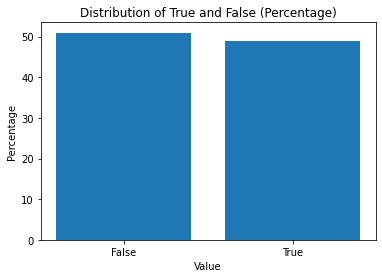

In [44]:
# Count the occurrences of True and False
value_counts = all_pairs['simple_binary_similarity'].value_counts(normalize=True) * 100

# Plot the distribution as a percentage
plt.bar(value_counts.index.astype(str), value_counts.values)
plt.xlabel('Value')
plt.ylabel('Percentage')
plt.title('Distribution of True and False (Percentage)')
plt.show()

### Binary Embedding Threshold Similarity

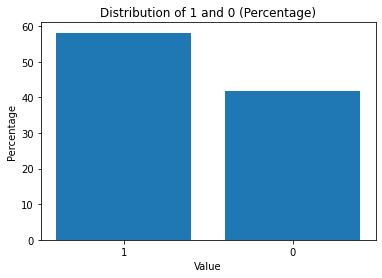

In [45]:
#binary_embedding_similarity
value_counts = all_pairs['binary_threshold_embedding_similarity'].value_counts(normalize=True) * 100

# Plot the distribution as a percentage
plt.bar(value_counts.index.astype(str), value_counts.values)
plt.xlabel('Value')
plt.ylabel('Percentage')
plt.title('Distribution of 1 and 0 (Percentage)')
plt.show()

### Simple Cosine Similarity

In [46]:
all_pairs['simple_cosine_similarity'].describe()

count    1.124250e+06
mean     7.948882e-02
std      9.792132e-02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.386750e-01
max      8.944272e-01
Name: simple_cosine_similarity, dtype: float64

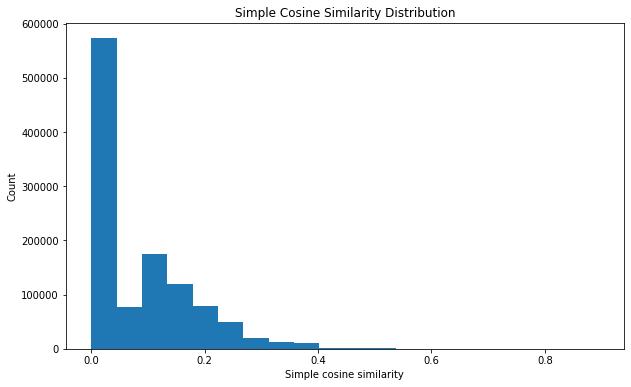

In [47]:
all_pairs['simple_cosine_similarity'].plot(kind='hist', bins=20, figsize=(10, 6))

# Add labels and a title to the plot
plt.xlabel('Simple cosine similarity')
plt.ylabel('Count')
plt.title('Simple Cosine Similarity Distribution')

# Display the plot
plt.show()

### Simple Weighted Cosine Similarity

In [48]:
all_pairs['simple_weighted_cosine_similarity'].describe()

count    1.124250e+06
mean     1.539817e-02
std      1.920589e-02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.705787e-02
max      3.396312e-01
Name: simple_weighted_cosine_similarity, dtype: float64

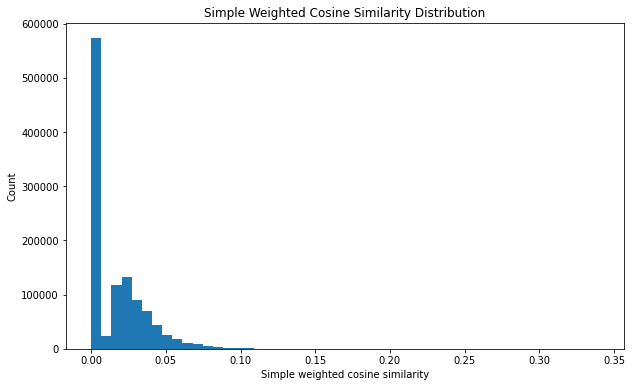

In [49]:
all_pairs['simple_weighted_cosine_similarity'].plot(kind='hist', bins=50, figsize=(10, 6))

# Add labels and a title to the plot
plt.xlabel('Simple weighted cosine similarity')
plt.ylabel('Count')
plt.title('Simple Weighted Cosine Similarity Distribution')

# Display the plot
plt.show()

### Simple Word Embedding Cosine

We can see that this distribution shows that many of the profiles are considered similar if we simply average out their interest embeddings, treating them as a single sentence, and then calculate the cosine similarity. Maybe this is not the best way to distinguish some of the user profiles.

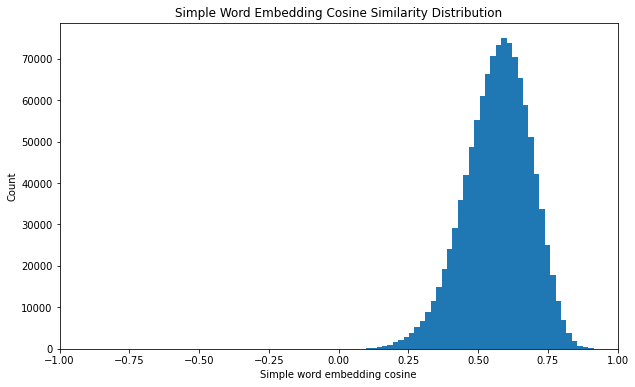

In [50]:
all_pairs['simple_word_embedding_cosine'].plot(kind='hist', bins=50, figsize=(10, 6))

# Add labels and a title to the plot
plt.xlabel('Simple word embedding cosine')
plt.ylabel('Count')
plt.title('Simple Word Embedding Cosine Similarity Distribution')
plt.xlim(-1, 1)

# Display the plot
plt.show()

### Cosine Embedding Similarity

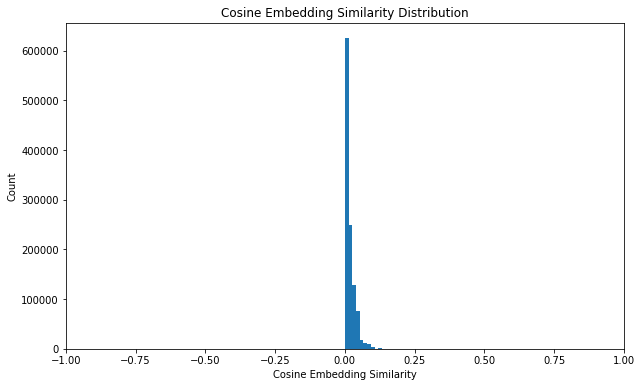

In [51]:
#cosine_embeddings_similarity

all_pairs['cosine_embeddings_similarity'].plot(kind='hist', bins=50, figsize=(10, 6))

# Add labels and a title to the plot
plt.xlabel('Cosine Embedding Similarity')
plt.ylabel('Count')
plt.title('Cosine Embedding Similarity Distribution')
plt.xlim(-1, 1)

# Display the plot
plt.show()

In [52]:
all_pairs['cosine_embeddings_similarity'].describe()

count    1.124250e+06
mean     1.520041e-02
std      1.915259e-02
min      0.000000e+00
25%      0.000000e+00
50%      1.041667e-02
75%      2.500000e-02
max      6.666667e-01
Name: cosine_embeddings_similarity, dtype: float64

### Average Similarity

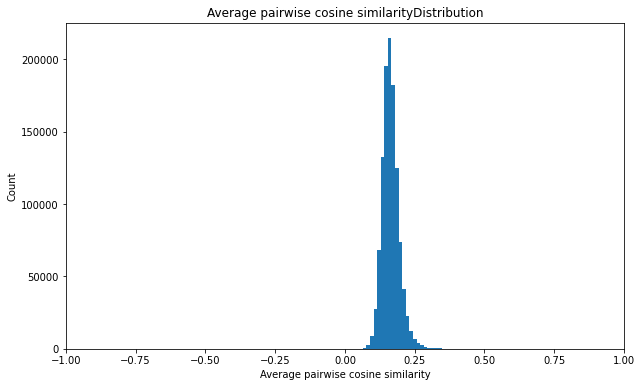

In [53]:
all_pairs['average_similarity'].plot(kind='hist', bins=50, figsize=(10, 6))

# Add labels and a title to the plot
plt.xlabel('Average pairwise cosine similarity')
plt.ylabel('Count')
plt.title('Average pairwise cosine similarityDistribution')
plt.xlim(-1, 1)

# Display the plot
plt.show()

In [54]:
all_pairs['average_similarity'].describe()

count    1.124250e+06
mean     1.638019e-01
std      3.045295e-02
min     -1.928619e-04
25%      1.439871e-01
50%      1.613315e-01
75%      1.804686e-01
max      6.417977e-01
Name: average_similarity, dtype: float64

### Maximum Similarity

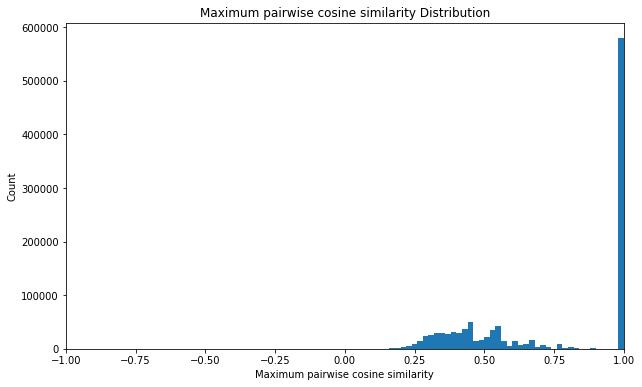

In [55]:
all_pairs['max_similarity'].plot(kind='hist', bins=50, figsize=(10, 6))

# Add labels and a title to the plot
plt.xlabel('Maximum pairwise cosine similarity')
plt.ylabel('Count')
plt.title('Maximum pairwise cosine similarity Distribution')
plt.xlim(-1, 1)

# Display the plot
plt.show()

### Top three average

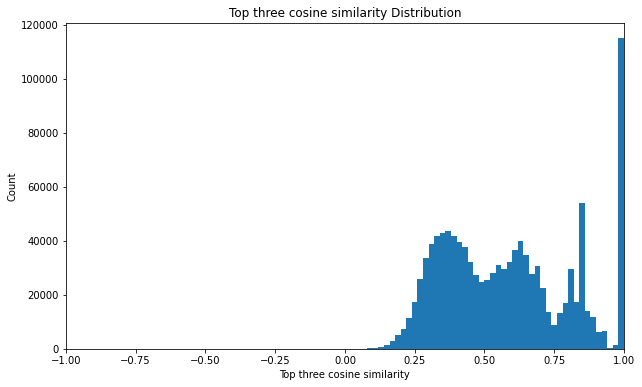

In [224]:
all_pairs['top_three_avg'].plot(kind='hist', bins=50, figsize=(10, 6))

# Add labels and a title to the plot
plt.xlabel('Top three cosine similarity')
plt.ylabel('Count')
plt.title('Top three cosine similarity Distribution')
plt.xlim(-1, 1)

# Display the plot
plt.show()

## Distribution by Gender based on pairs

### Simple Binary Similarity

In [60]:
# Group the dataframe by 'gender_pairs' and 'binary_similarity'
count_by_gender_comb = all_pairs.groupby(['GENDER_COMBINATION', 'simple_binary_similarity'])['User_ID_1'].count().reset_index()

#total count by gender-pair
gender_total = count_by_gender_comb.groupby('GENDER_COMBINATION')['User_ID_1'].sum()

count_by_gender_comb = count_by_gender_comb.merge(gender_total, on = 'GENDER_COMBINATION', how = 'left')

#percentagewise
count_by_gender_comb['percentage'] = (count_by_gender_comb['User_ID_1_x'] / count_by_gender_comb['User_ID_1_y']) * 100

count_by_gender_comb['simple_binary'] = count_by_gender_comb['simple_binary_similarity'].apply(lambda x: 1 if x else 0)

count_by_gender_comb

,GENDER_COMBINATION,simple_binary_similarity,User_ID_1_x,User_ID_1_y,percentage,simple_binary
0,F-F,False,184751,403651,45.769984,0
1,F-F,True,218900,403651,54.230016,1
2,F-M,False,293609,540299,54.341948,0
3,F-M,True,246690,540299,45.658052,1
4,M-M,False,94678,180300,52.511370,0
5,M-M,True,85622,180300,47.488630,1


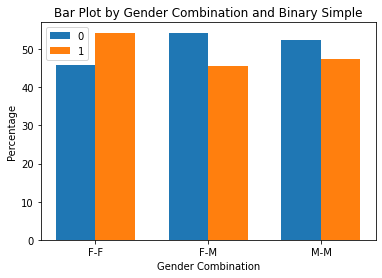

In [61]:
# Assuming you have a DataFrame named 'df' with columns 'GENDER_COMBINATION', 'binary_threshold_embedding_similarity', and 'percentage'
pivoted_df = count_by_gender_comb.pivot(index='GENDER_COMBINATION', columns='simple_binary', values='percentage')

# Extract the categories and values for plotting
categories = pivoted_df.index.tolist()
values_0 = pivoted_df[0].tolist()
values_1 = pivoted_df[1].tolist()

# Plotting
x = np.arange(len(categories))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, values_0, width, label='0')
rects2 = ax.bar(x + width/2, values_1, width, label='1')

ax.set_xlabel('Gender Combination')
ax.set_ylabel('Percentage')
ax.set_title('Bar Plot by Gender Combination and Binary Simple')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

### Binary Threshold Similarity

In [62]:
# Group the dataframe by 'gender_pairs' and 'binary_similarity'
count_by_gender_comb = all_pairs.groupby(['GENDER_COMBINATION', 'binary_threshold_embedding_similarity'])['User_ID_1'].count().reset_index()

#total count by gender-pair
gender_total = count_by_gender_comb.groupby('GENDER_COMBINATION')['User_ID_1'].sum()

count_by_gender_comb = count_by_gender_comb.merge(gender_total, on = 'GENDER_COMBINATION', how = 'left')

#percentagewise
count_by_gender_comb['percentage'] = (count_by_gender_comb['User_ID_1_x'] / count_by_gender_comb['User_ID_1_y']) * 100

count_by_gender_comb

,GENDER_COMBINATION,binary_threshold_embedding_similarity,User_ID_1_x,User_ID_1_y,percentage
0,F-F,0,144912,403651,35.900320
1,F-F,1,258739,403651,64.099680
2,F-M,0,245028,540299,45.350445
3,F-M,1,295271,540299,54.649555
4,M-M,0,80039,180300,44.392124
5,M-M,1,100261,180300,55.607876


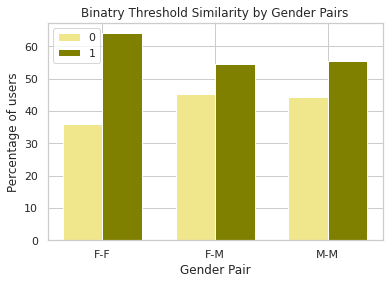

In [74]:
# Assuming you have a DataFrame named 'df' with columns 'GENDER_COMBINATION', 'binary_threshold_embedding_similarity', and 'percentage'
pivoted_df = count_by_gender_comb.pivot(index='GENDER_COMBINATION', columns='binary_threshold_embedding_similarity', values='percentage')

# Extract the categories and values for plotting
categories = pivoted_df.index.tolist()
values_0 = pivoted_df[0].tolist()
values_1 = pivoted_df[1].tolist()

# Plotting
x = np.arange(len(categories))
width = 0.35

sns.set(style='whitegrid')

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, values_0, width, label='0', color = 'khaki')
rects2 = ax.bar(x + width/2, values_1, width, label='1', color = 'olive')

ax.set_xlabel('Gender Pair')
ax.set_ylabel('Percentage of users')
ax.set_title('Binatry Threshold Similarity by Gender Pairs')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

plt.savefig('plot.png', transparent=True)
plt.show()

Female to female similarity seems to be larger than male to female and male to male similarity (consistent with some other papers)

### Simple Cosine Similarity

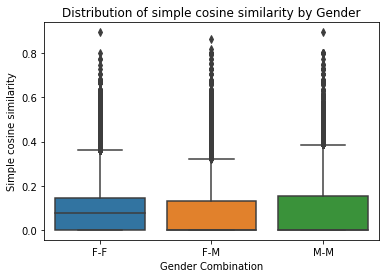

In [60]:
sns.boxplot(x='GENDER_COMBINATION', y='simple_cosine_similarity', data=all_pairs)

# Set labels and title
plt.xlabel('Gender Combination')
plt.ylabel('Simple cosine similarity')
plt.title('Distribution of simple cosine similarity by Gender')

# Display the plot
plt.show()

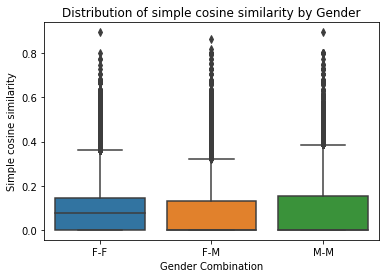

In [61]:
filtered_df = all_pairs[all_pairs['simple_cosine_similarity'] != 0]

sns.boxplot(x='GENDER_COMBINATION', y='simple_cosine_similarity', data=all_pairs)

# Set labels and title
plt.xlabel('Gender Combination')
plt.ylabel('Simple cosine similarity')
plt.title('Distribution of simple cosine similarity by Gender')

# Display the plot
plt.show()

In [62]:
filtered_df[filtered_df['GENDER_COMBINATION'] == 'F-F']['simple_cosine_similarity'].describe()

count    218900.000000
mean          0.158052
std           0.076974
min           0.042258
25%           0.102062
50%           0.138013
75%           0.200000
max           0.894427
Name: simple_cosine_similarity, dtype: float64

In [63]:
filtered_df[filtered_df['GENDER_COMBINATION'] == 'F-M']['simple_cosine_similarity'].describe()

count    246690.000000
mean          0.159861
std           0.076112
min           0.043519
25%           0.106600
50%           0.138675
75%           0.200000
max           0.866025
Name: simple_cosine_similarity, dtype: float64

In [64]:
filtered_df[filtered_df['GENDER_COMBINATION'] == 'M-M']['simple_cosine_similarity'].describe()

count    85622.000000
mean         0.179063
std          0.086431
min          0.042796
25%          0.119523
50%          0.158114
75%          0.204124
max          0.894427
Name: simple_cosine_similarity, dtype: float64

### Simple Weighted Cosine Similarity

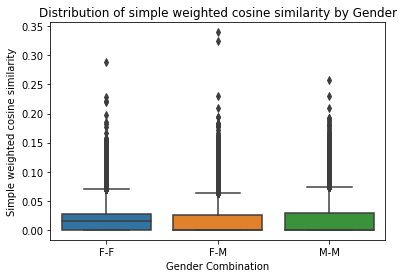

In [65]:
sns.boxplot(x='GENDER_COMBINATION', y='simple_weighted_cosine_similarity', data=all_pairs)

# Set labels and title
plt.xlabel('Gender Combination')
plt.ylabel('Simple weighted cosine similarity')
plt.title('Distribution of simple weighted cosine similarity by Gender')

# Display the plot
plt.show()

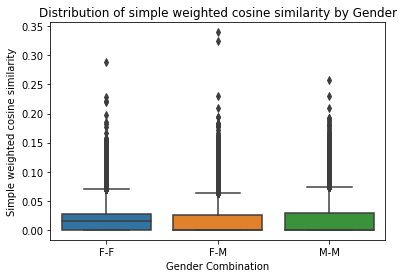

In [66]:
# Create a filtered DataFrame excluding the 0 values
filtered_df = all_pairs[all_pairs['simple_weighted_cosine_similarity'] != 0]

sns.boxplot(x='GENDER_COMBINATION', y='simple_weighted_cosine_similarity', data=all_pairs)

# Set labels and title
plt.xlabel('Gender Combination')
plt.ylabel('Simple weighted cosine similarity')
plt.title('Distribution of simple weighted cosine similarity by Gender')

# Display the plot
plt.show()

### Simple Word Emebdding Cosine

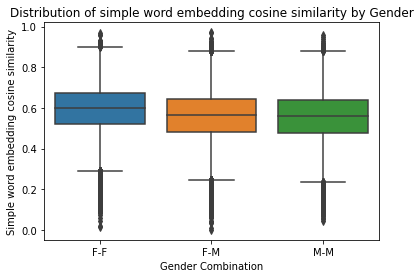

In [67]:
sns.boxplot(x='GENDER_COMBINATION', y='simple_word_embedding_cosine', data=all_pairs)

# Set labels and title
plt.xlabel('Gender Combination')
plt.ylabel('Simple word embedding cosine similarity')
plt.title('Distribution of simple word embedding cosine similarity by Gender')

# Display the plot
plt.show()

### Cosine Embedding Similarity

Do we want to have some balancing between 0 and non 0 samples?

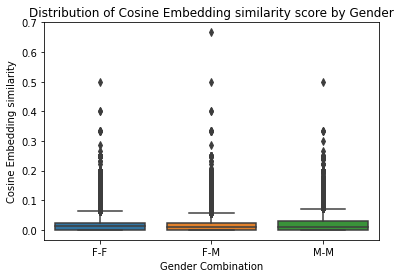

In [68]:
sns.boxplot(x='GENDER_COMBINATION', y='cosine_embeddings_similarity', data=all_pairs)

# Set labels and title
plt.xlabel('Gender Combination')
plt.ylabel('Cosine Embedding similarity')
plt.title('Distribution of Cosine Embedding similarity score by Gender')

# Display the plot
plt.show()

In [69]:
all_pairs[all_pairs['GENDER_COMBINATION'] == 'F-F']['cosine_embeddings_similarity'].describe()

count    403651.000000
mean          0.015780
std           0.018326
min           0.000000
25%           0.000000
50%           0.011905
75%           0.025000
max           0.500000
Name: cosine_embeddings_similarity, dtype: float64

In [70]:
all_pairs[all_pairs['GENDER_COMBINATION'] == 'F-M']['cosine_embeddings_similarity'].describe()

count    540299.000000
mean          0.014054
std           0.018427
min           0.000000
25%           0.000000
50%           0.008547
75%           0.023077
max           0.666667
Name: cosine_embeddings_similarity, dtype: float64

In [71]:
all_pairs[all_pairs['GENDER_COMBINATION'] == 'M-M']['cosine_embeddings_similarity'].describe()

count    180300.000000
mean          0.017338
std           0.022554
min           0.000000
25%           0.000000
50%           0.010989
75%           0.028571
max           0.500000
Name: cosine_embeddings_similarity, dtype: float64

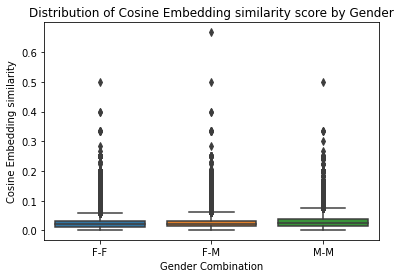

In [72]:
filtered_df = all_pairs[all_pairs['cosine_embeddings_similarity'] != 0]

sns.boxplot(x='GENDER_COMBINATION', y='cosine_embeddings_similarity', data=filtered_df)

# Set labels and title
plt.xlabel('Gender Combination')
plt.ylabel('Cosine Embedding similarity')
plt.title('Distribution of Cosine Embedding similarity score by Gender')

# Display the plot
plt.show()

### Average Similarity

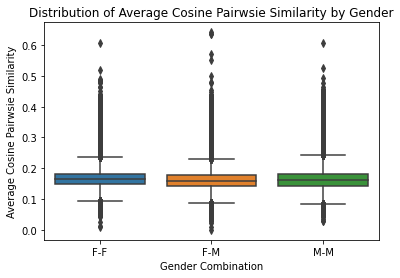

In [73]:
sns.boxplot(x='GENDER_COMBINATION', y='average_similarity', data=all_pairs)

# Set labels and title
plt.xlabel('Gender Combination')
plt.ylabel('Average Cosine Pairwsie Similarity')
plt.title('Distribution of Average Cosine Pairwsie Similarity by Gender')

# Display the plot
plt.show()

### Maximum Similarity

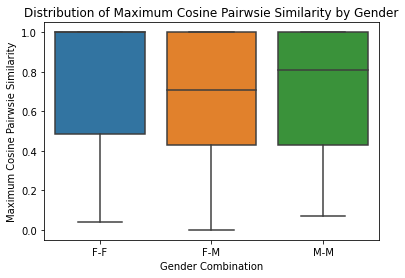

In [74]:
sns.boxplot(x='GENDER_COMBINATION', y='max_similarity', data=all_pairs)

# Set labels and title
plt.xlabel('Gender Combination')
plt.ylabel('Maximum Cosine Pairwsie Similarity')
plt.title('Distribution of Maximum Cosine Pairwsie Similarity by Gender')

# Display the plot
plt.show()

In [76]:
all_pairs[all_pairs['GENDER_COMBINATION'] == 'F-F']['max_similarity'].describe()

count    403651.000000
mean          0.771156
std           0.276626
min           0.037567
25%           0.485624
50%           1.000000
75%           1.000000
max           1.000000
Name: max_similarity, dtype: float64

In [77]:
all_pairs[all_pairs['GENDER_COMBINATION'] == 'M-M']['max_similarity'].describe()

count    180300.000000
mean          0.719189
std           0.294261
min           0.068484
25%           0.427526
50%           0.807679
75%           1.000000
max           1.000000
Name: max_similarity, dtype: float64

### Top three similarity

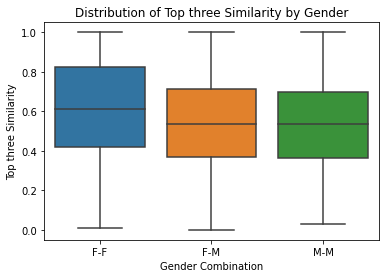

In [225]:
sns.boxplot(x='GENDER_COMBINATION', y='top_three_avg', data=all_pairs)

# Set labels and title
plt.xlabel('Gender Combination')
plt.ylabel('Top three Similarity')
plt.title('Distribution of Top three Similarity by Gender')

# Display the plot
plt.show()

## Distribution Based on Age Difference

### Simple Binary Similarity

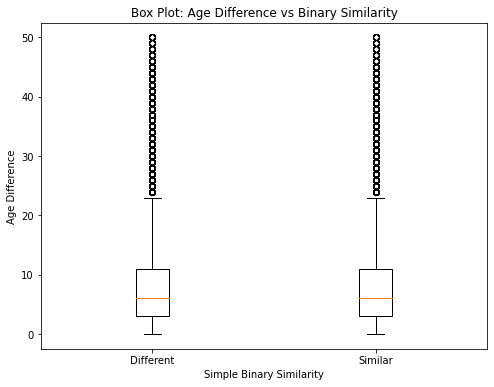

In [79]:
plt.figure(figsize=(8, 6))
plt.boxplot([all_pairs[all_pairs['simple_binary_similarity'] == False]['age_difference'],
             all_pairs[all_pairs['simple_binary_similarity'] == True]['age_difference']],
            labels=['Different', 'Similar'])
plt.xlabel('Simple Binary Similarity')
plt.ylabel('Age Difference')
plt.title('Box Plot: Age Difference vs Binary Similarity')
plt.show()

In [80]:
all_pairs[all_pairs['simple_binary_similarity'] == False]['age_difference'].describe()

count    573038.000000
mean          8.121088
std           7.164880
min           0.000000
25%           3.000000
50%           6.000000
75%          11.000000
max          50.000000
Name: age_difference, dtype: float64

In [81]:
all_pairs[all_pairs['simple_binary_similarity'] == True]['age_difference'].describe()

count    551212.000000
mean          7.687155
std           6.951228
min           0.000000
25%           3.000000
50%           6.000000
75%          11.000000
max          50.000000
Name: age_difference, dtype: float64

### Binary Threshold Similarity

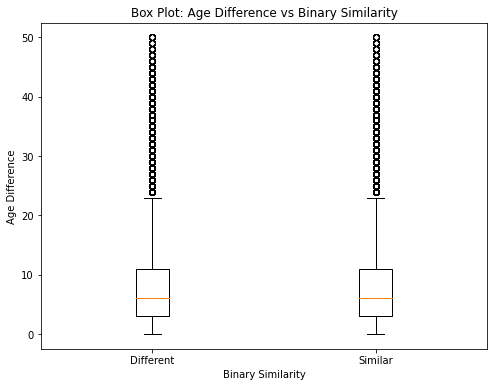

In [82]:
plt.figure(figsize=(8, 6))
plt.boxplot([all_pairs[all_pairs['binary_threshold_embedding_similarity'] == 0]['age_difference'],
             all_pairs[all_pairs['binary_threshold_embedding_similarity'] == 1]['age_difference']],
            labels=['Different', 'Similar'])
plt.xlabel('Binary Similarity')
plt.ylabel('Age Difference')
plt.title('Box Plot: Age Difference vs Binary Similarity')
plt.show()

In [83]:
all_pairs[all_pairs['binary_threshold_embedding_similarity'] == 0]['age_difference'].describe()

count    469979.000000
mean          8.214729
std           7.260436
min           0.000000
25%           3.000000
50%           6.000000
75%          11.000000
max          50.000000
Name: age_difference, dtype: float64

In [84]:
all_pairs[all_pairs['binary_threshold_embedding_similarity'] == 1]['age_difference'].describe()

count    654271.000000
mean          7.688242
std           6.911545
min           0.000000
25%           3.000000
50%           6.000000
75%          11.000000
max          50.000000
Name: age_difference, dtype: float64

### Simple Cosine Similarity

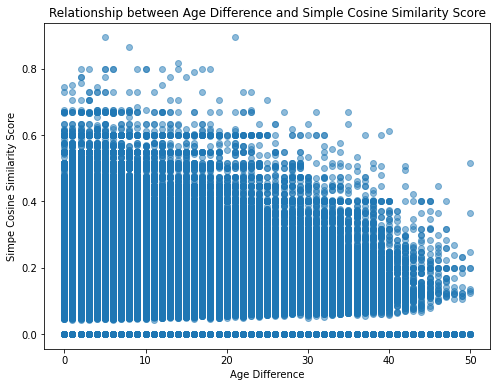

In [85]:
plt.figure(figsize=(8, 6))
plt.scatter(all_pairs['age_difference'], all_pairs['simple_cosine_similarity'], alpha = 0.5)
plt.xlabel('Age Difference')
plt.ylabel('Simpe Cosine Similarity Score')
plt.title('Relationship between Age Difference and Simple Cosine Similarity Score')
plt.show()

In [86]:
all_pairs['age_difference'].describe()

count    1.124250e+06
mean     7.908334e+00
std      7.064264e+00
min      0.000000e+00
25%      3.000000e+00
50%      6.000000e+00
75%      1.100000e+01
max      5.000000e+01
Name: age_difference, dtype: float64

In [81]:
bin_edges = [0, 10, 20, 30, 40, 55, 100]

# Create a new column 'age_difference_bin' containing the age difference bins
all_pairs['age_difference_bin'] = pd.cut(all_pairs['age_difference'], bins=bin_edges)

all_pairs.head()

,User_ID_1,User_ID_2,PROFILE_GENDER_1,PROFILE_AGE_1,MODE_1,set_interests_1,set_avg_embedding_1,PROFILE_GENDER_2,PROFILE_AGE_2,MODE_2,...,simple_binary_similarity,binary_threshold_embedding_similarity,simple_cosine_similarity,simple_weighted_cosine_similarity,simple_word_embedding_cosine,cosine_embeddings_similarity,average_similarity,max_similarity,top_three_avg,age_difference_bin
0,1995045439,2322567316,F,33,BFF,"[306, 308, 421, 426, 814, 918, 1103, 1107, 120...","[[0.10009765625, -0.039306640625, 0.0717773437...",F,37,BFF,...,True,1,0.075378,0.021951,0.662563,0.017045,0.148595,1.000000,0.836912,"(0, 10]"
1,1995045439,2172933118,F,33,BFF,"[306, 308, 421, 426, 814, 918, 1103, 1107, 120...","[[0.10009765625, -0.039306640625, 0.0717773437...",F,26,BFF,...,False,1,0.000000,0.000000,0.637685,0.003676,0.136989,0.605668,0.482188,"(0, 10]"
2,2322567316,2172933118,F,37,BFF,"[421, 402, 501, 503, 503, 504, 508, 1116, 1901...","[[0.251953125, 0.0458984375, 0.09716796875, 0....",F,26,BFF,...,True,1,0.292509,0.052183,0.795578,0.026738,0.196519,1.000000,1.000000,"(10, 20]"
3,1995045439,829344741,F,33,BFF,"[306, 308, 421, 426, 814, 918, 1103, 1107, 120...","[[0.10009765625, -0.039306640625, 0.0717773437...",M,26,BFF,...,False,0,0.000000,0.000000,0.536655,0.000000,0.123365,0.442734,0.410800,"(0, 10]"
4,2322567316,829344741,F,37,BFF,"[421, 402, 501, 503, 503, 504, 508, 1116, 1901...","[[0.251953125, 0.0458984375, 0.09716796875, 0....",M,26,BFF,...,True,1,0.250873,0.047064,0.582978,0.020979,0.150134,1.000000,1.000000,"(10, 20]"


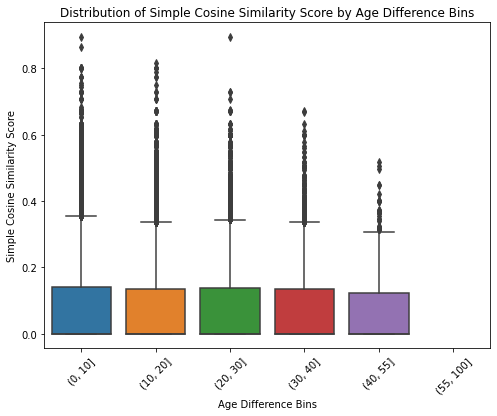

In [88]:
filtered_df = all_pairs[all_pairs['simple_cosine_similarity'] != 0]


plt.figure(figsize=(8, 6))
sns.boxplot(data=all_pairs, x='age_difference_bin', y='simple_cosine_similarity')
plt.xlabel('Age Difference Bins')
plt.ylabel('Simple Cosine Similarity Score')
plt.title('Distribution of Simple Cosine Similarity Score by Age Difference Bins')
plt.xticks(rotation=45)
plt.show()

### Weighted Cosine Similarity

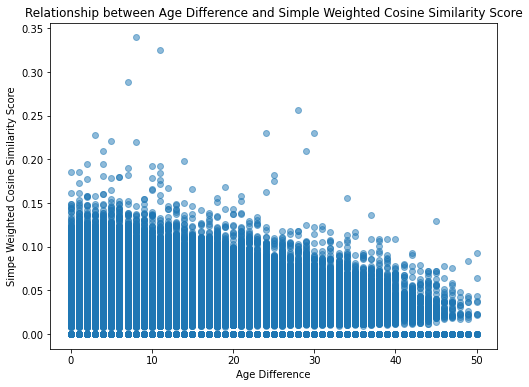

In [89]:
plt.figure(figsize=(8, 6))
plt.scatter(all_pairs['age_difference'], all_pairs['simple_weighted_cosine_similarity'], alpha = 0.5)
plt.xlabel('Age Difference')
plt.ylabel('Simpe Weighted Cosine Similarity Score')
plt.title('Relationship between Age Difference and Simple Weighted Cosine Similarity Score')
plt.show()

### Simple Word Embedding Cosine

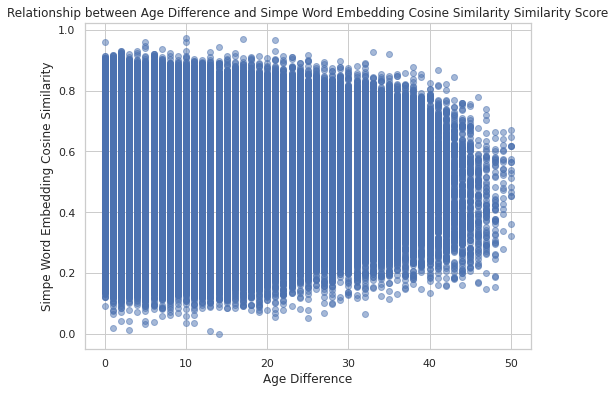

In [82]:
plt.figure(figsize=(8, 6))
plt.scatter(all_pairs['age_difference'], all_pairs['simple_word_embedding_cosine'], alpha = 0.5)
plt.xlabel('Age Difference')
plt.ylabel('Simpe Word Embedding Cosine Similarity')
plt.title('Relationship between Age Difference and Simpe Word Embedding Cosine Similarity Similarity Score')
plt.show()

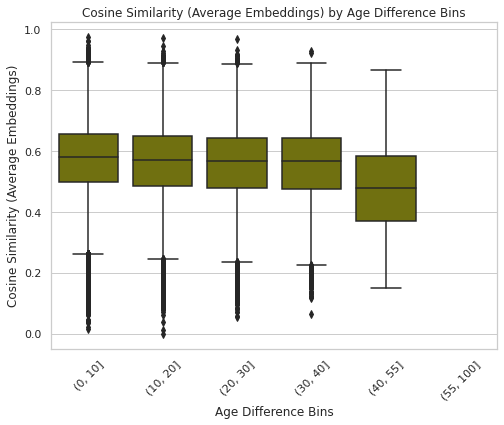

In [87]:

plt.figure(figsize=(8, 6))
sns.boxplot(data=all_pairs, x='age_difference_bin', y='simple_word_embedding_cosine', color = 'olive')
plt.xlabel('Age Difference Bins')
plt.ylabel('Cosine Similarity (Average Embeddings)')
plt.title('Cosine Similarity (Average Embeddings) by Age Difference Bins')
plt.xticks(rotation=45)
plt.savefig('plot.png', transparent=True)
plt.show()

### Cosine Embeddng Similarity

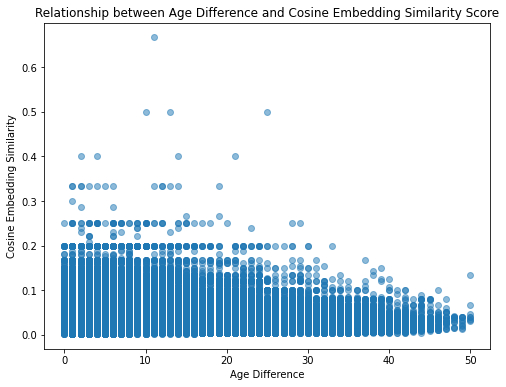

In [92]:
filtered_df = all_pairs[all_pairs['simple_cosine_similarity'] != 0]

plt.figure(figsize=(8, 6))
plt.scatter(filtered_df['age_difference'], filtered_df['cosine_embeddings_similarity'], alpha = 0.5)
plt.xlabel('Age Difference')
plt.ylabel('Cosine Embedding Similarity')
plt.title('Relationship between Age Difference and Cosine Embedding Similarity Score')
plt.show()

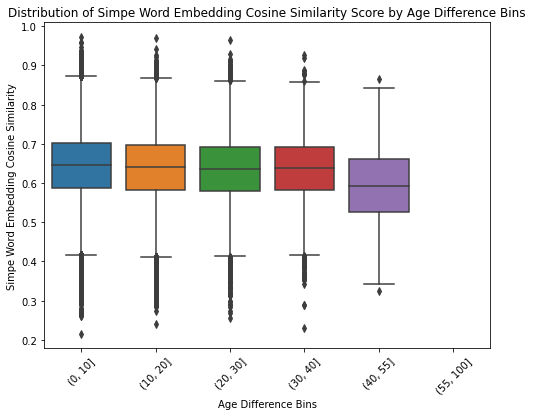

In [93]:
filtered_df = all_pairs[all_pairs['simple_cosine_similarity'] != 0]

plt.figure(figsize=(8, 6))
sns.boxplot(data=filtered_df , x='age_difference_bin', y='simple_word_embedding_cosine')
plt.xlabel('Age Difference Bins')
plt.ylabel('Simpe Word Embedding Cosine Similarity')
plt.title('Distribution of Simpe Word Embedding Cosine Similarity Score by Age Difference Bins')
plt.xticks(rotation=45)
plt.show()

### Average Similarity

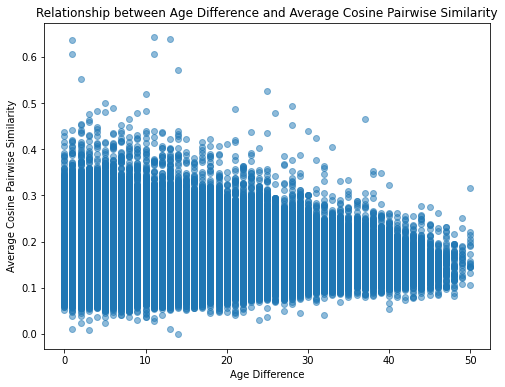

In [94]:
plt.figure(figsize=(8, 6))
plt.scatter(all_pairs['age_difference'], all_pairs['average_similarity'], alpha = 0.5)
plt.xlabel('Age Difference')
plt.ylabel('Average Cosine Pairwise Similarity')
plt.title('Relationship between Age Difference and Average Cosine Pairwise Similarity')
plt.show()

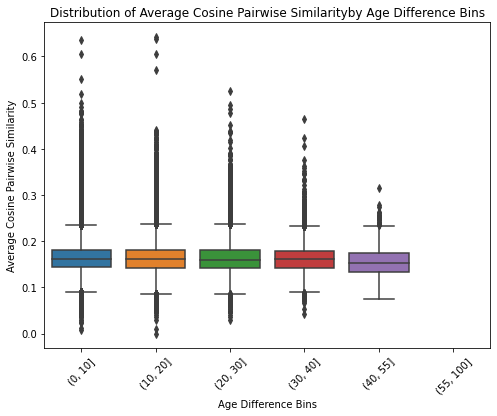

In [95]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=all_pairs , x='age_difference_bin', y='average_similarity')
plt.xlabel('Age Difference Bins')
plt.ylabel('Average Cosine Pairwise Similarity')
plt.title('Distribution of Average Cosine Pairwise Similarityby Age Difference Bins')
plt.xticks(rotation=45)
plt.show()

### Maximum Similarity

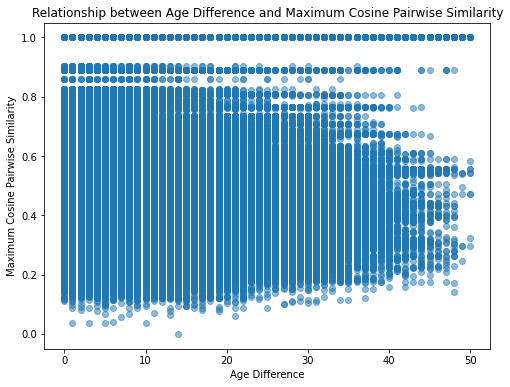

In [96]:
#all_pairs['max_similarity']

plt.figure(figsize=(8, 6))
plt.scatter(all_pairs['age_difference'], all_pairs['max_similarity'], alpha = 0.5)
plt.xlabel('Age Difference')
plt.ylabel('Maximum Cosine Pairwise Similarity')
plt.title('Relationship between Age Difference and Maximum Cosine Pairwise Similarity')
plt.show()

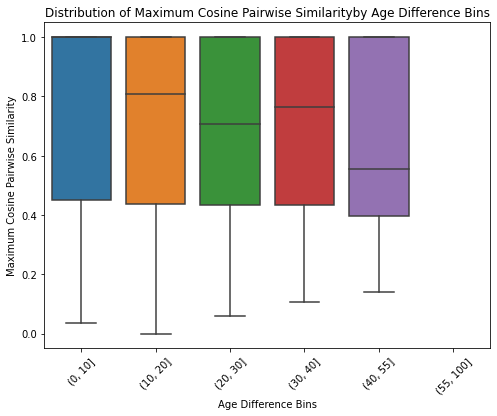

In [97]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=all_pairs , x='age_difference_bin', y='max_similarity')
plt.xlabel('Age Difference Bins')
plt.ylabel('Maximum Cosine Pairwise Similarity')
plt.title('Distribution of Maximum Cosine Pairwise Similarityby Age Difference Bins')
plt.xticks(rotation=45)
plt.show()

### Top three similarity

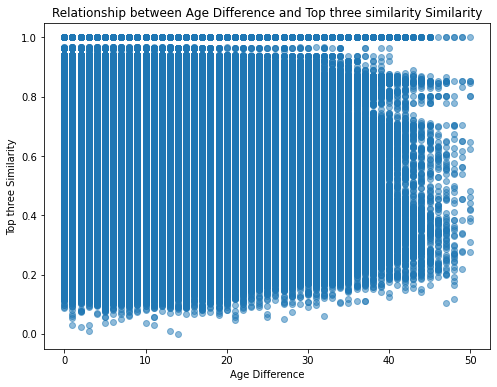

In [226]:
plt.figure(figsize=(8, 6))
plt.scatter(all_pairs['age_difference'], all_pairs['top_three_avg'], alpha = 0.5)
plt.xlabel('Age Difference')
plt.ylabel('Top three Similarity')
plt.title('Relationship between Age Difference and Top three similarity Similarity')
plt.show()

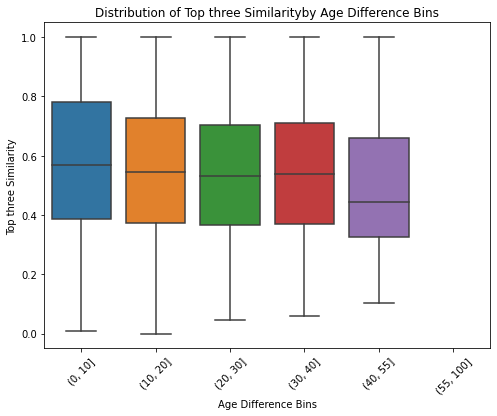

In [230]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=all_pairs , x='age_difference_bin', y='top_three_avg')
plt.xlabel('Age Difference Bins')
plt.ylabel('Top three Similarity')
plt.title('Distribution of Top three Similarityby Age Difference Bins')
plt.xticks(rotation=45)
plt.show()

## Distribution by Mode

### Simple Binary Similarity

In [88]:
# Group the dataframe by 'mode_combinations' and 'binary_similarity'
count_by_mode_comb = all_pairs.groupby(['MODE_COMBINATION', 'simple_binary_similarity'])['User_ID_1'].count().reset_index()

#total count by gender-pair
gender_total = count_by_mode_comb.groupby('MODE_COMBINATION')['User_ID_1'].sum()

count_by_mode_comb = count_by_mode_comb.merge(gender_total, on = 'MODE_COMBINATION', how = 'left')

#percentagewise
count_by_mode_comb['percentage'] = (count_by_mode_comb['User_ID_1_x'] / count_by_mode_comb['User_ID_1_y']) * 100

count_by_mode_comb['simple_binary'] = count_by_mode_comb['simple_binary_similarity'].apply(lambda x: 1 if x else 0)

count_by_mode_comb

,MODE_COMBINATION,simple_binary_similarity,User_ID_1_x,User_ID_1_y,percentage,simple_binary
0,BFF-BFF,False,50471,124750,40.457715,0
1,BFF-BFF,True,74279,124750,59.542285,1
2,BFF-BOTH,False,105868,250000,42.347200,0
3,BFF-BOTH,True,144132,250000,57.652800,1
4,BFF-DATING,False,150884,250000,60.353600,0
5,BFF-DATING,True,99116,250000,39.646400,1
6,BOTH-BOTH,False,53044,124750,42.520240,0
7,BOTH-BOTH,True,71706,124750,57.479760,1
8,DATING-BOTH,False,141167,250000,56.466800,0
9,DATING-BOTH,True,108833,250000,43.533200,1


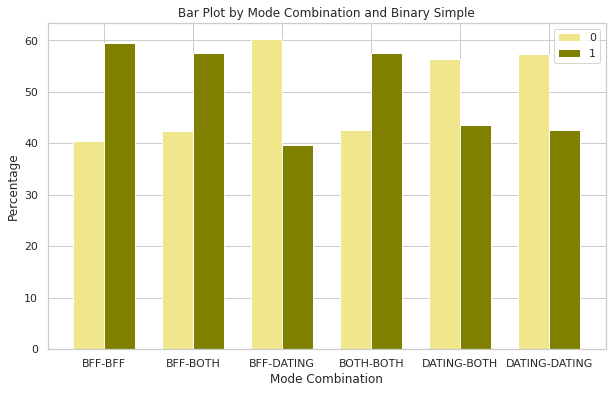

In [92]:
pivoted_df = count_by_mode_comb.pivot(index='MODE_COMBINATION', columns='simple_binary', values='percentage')

# Extract the categories and values for plotting
categories = pivoted_df.index.tolist()
values_0 = pivoted_df[0].tolist()
values_1 = pivoted_df[1].tolist()

# Plotting
x = np.arange(len(categories))
width = 0.35


fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, values_0, width, label='0', color = 'khaki')
rects2 = ax.bar(x + width/2, values_1, width, label='1', color = 'olive')

ax.set_xlabel('Mode Combination')
ax.set_ylabel('Percentage')
ax.set_title('Bar Plot by Mode Combination and Binary Simple')
ax.set_xticks(x)
ax.set_xticklabels(categories)
plt.savefig('plot.png', transparent=True)
ax.legend()

### Binary Threshold Similarity

In [108]:
count_by_mode_comb = all_pairs.groupby(['MODE_COMBINATION', 'binary_threshold_embedding_similarity'])['User_ID_1'].count().reset_index()

gender_total = count_by_mode_comb.groupby('MODE_COMBINATION')['User_ID_1'].sum()

count_by_mode_comb = count_by_mode_comb.merge(gender_total, on = 'MODE_COMBINATION', how = 'left')

#percentagewise
count_by_mode_comb['percentage'] = (count_by_mode_comb['User_ID_1_x'] / count_by_mode_comb['User_ID_1_y']) * 100

count_by_mode_comb

,MODE_COMBINATION,binary_threshold_embedding_similarity,User_ID_1_x,User_ID_1_y,percentage
0,BFF-BFF,0,38906,124750,31.187174
1,BFF-BFF,1,85844,124750,68.812826
2,BFF-BOTH,0,82719,250000,33.087600
3,BFF-BOTH,1,167281,250000,66.912400
4,BFF-DATING,0,124723,250000,49.889200
5,BFF-DATING,1,125277,250000,50.110800
6,BOTH-BOTH,0,41795,124750,33.503006
7,BOTH-BOTH,1,82955,124750,66.496994
8,DATING-BOTH,0,117563,250000,47.025200
9,DATING-BOTH,1,132437,250000,52.974800


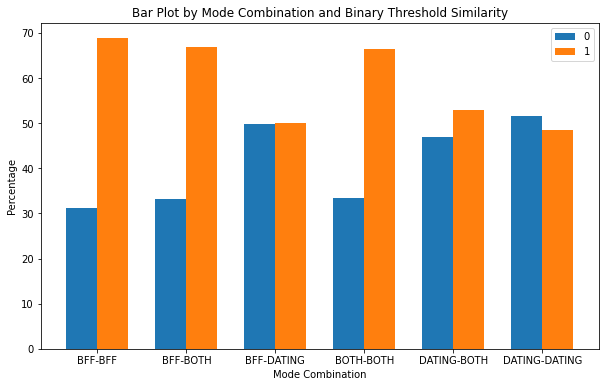

In [109]:
# Assuming you have a DataFrame named 'df' with columns 'GENDER_COMBINATION', 'binary_threshold_embedding_similarity', and 'percentage'
pivoted_df = count_by_mode_comb.pivot(index='MODE_COMBINATION', columns='binary_threshold_embedding_similarity', values='percentage')

# Extract the categories and values for plotting
categories = pivoted_df.index.tolist()
values_0 = pivoted_df[0].tolist()
values_1 = pivoted_df[1].tolist()

# Plotting
x = np.arange(len(categories))
width = 0.35


fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, values_0, width, label='0')
rects2 = ax.bar(x + width/2, values_1, width, label='1')

ax.set_xlabel('Mode Combination')
ax.set_ylabel('Percentage')
ax.set_title('Bar Plot by Mode Combination and Binary Threshold Similarity')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

### Simple Cosine Similarity

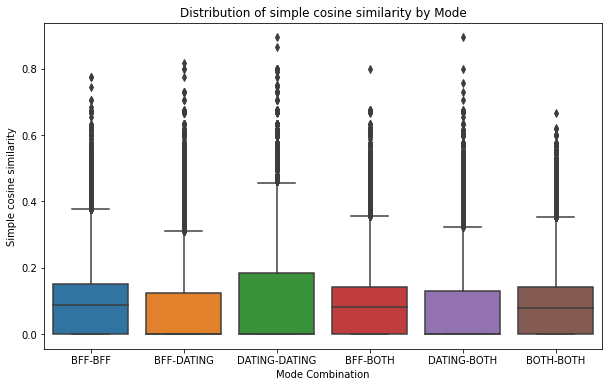

In [158]:
plt.figure(figsize=(10, 6))

sns.boxplot(x='MODE_COMBINATION', y='simple_cosine_similarity', data=all_pairs)

# Set labels and title
plt.xlabel('Mode Combination')
plt.ylabel('Simple cosine similarity')
plt.title('Distribution of simple cosine similarity by Mode')

# Display the plot
plt.show()

In [159]:
all_pairs[all_pairs['MODE_COMBINATION'] == 'BFF-BFF']['simple_cosine_similarity'].describe()

count    124750.000000
mean          0.092415
std           0.096282
min           0.000000
25%           0.000000
50%           0.087039
75%           0.150756
max           0.774597
Name: simple_cosine_similarity, dtype: float64

In [160]:
all_pairs[all_pairs['MODE_COMBINATION'] == 'DATING-DATING']['simple_cosine_similarity'].describe()

count    124750.000000
mean          0.090653
std           0.121266
min           0.000000
25%           0.000000
50%           0.000000
75%           0.182574
max           0.894427
Name: simple_cosine_similarity, dtype: float64

### Simple Weighted Cosine Similarity

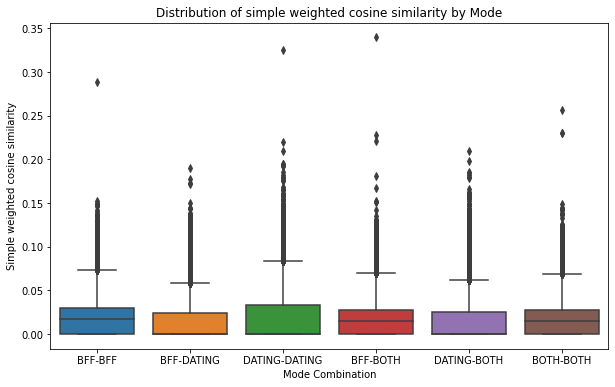

In [162]:
plt.figure(figsize=(10, 6))

sns.boxplot(x='MODE_COMBINATION', y='simple_weighted_cosine_similarity', data=all_pairs)

# Set labels and title
plt.xlabel('Mode Combination')
plt.ylabel('Simple weighted cosine similarity')
plt.title('Distribution of simple weighted cosine similarity by Mode')

# Display the plot
plt.show()

In [163]:
all_pairs[all_pairs['MODE_COMBINATION'] == 'DATING-DATING']['simple_weighted_cosine_similarity'].describe()

count    124750.000000
mean          0.017461
std           0.023708
min           0.000000
25%           0.000000
50%           0.000000
75%           0.033313
max           0.325147
Name: simple_weighted_cosine_similarity, dtype: float64

### Simple Word Embedding Cosine

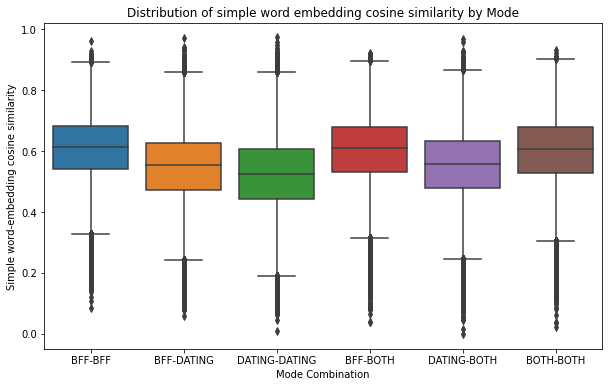

In [165]:
plt.figure(figsize=(10, 6))

sns.boxplot(x='MODE_COMBINATION', y='simple_word_embedding_cosine', data=all_pairs)

# Set labels and title
plt.xlabel('Mode Combination')
plt.ylabel('Simple word-embedding cosine similarity')
plt.title('Distribution of simple word embedding cosine similarity by Mode')

# Display the plot
plt.show()

### Cosine Embedding Similarity

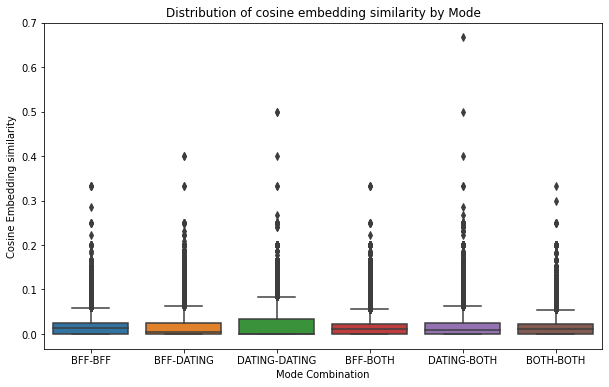

In [166]:
plt.figure(figsize=(10, 6))

sns.boxplot(x='MODE_COMBINATION', y='cosine_embeddings_similarity', data=all_pairs)

# Set labels and title
plt.xlabel('Mode Combination')
plt.ylabel('Cosine Embedding similarity')
plt.title('Distribution of cosine embedding similarity by Mode')

# Display the plot
plt.show()

In [167]:
all_pairs[all_pairs['MODE_COMBINATION'] == 'DATING-DATING']['cosine_embeddings_similarity'].describe()

count    124750.000000
mean          0.019679
std           0.026375
min           0.000000
25%           0.000000
50%           0.000000
75%           0.033333
max           0.500000
Name: cosine_embeddings_similarity, dtype: float64

### Average Similarity

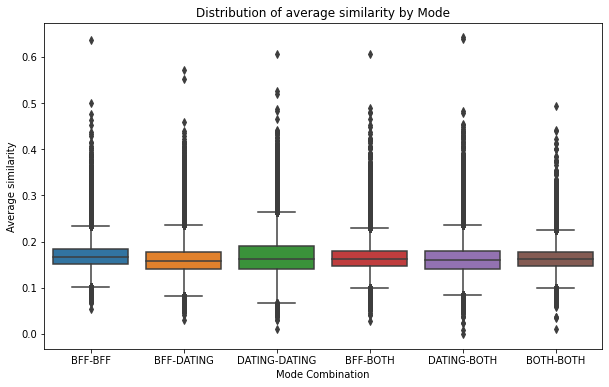

In [168]:
plt.figure(figsize=(10, 6))

sns.boxplot(x='MODE_COMBINATION', y='average_similarity', data=all_pairs)

# Set labels and title
plt.xlabel('Mode Combination')
plt.ylabel('Average similarity')
plt.title('Distribution of average similarity by Mode')

# Display the plot
plt.show()

### Maximum Similarity

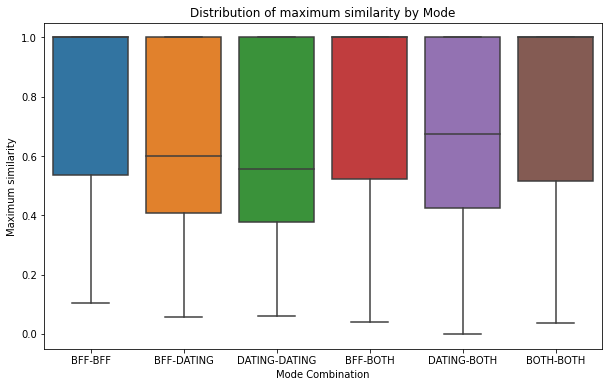

In [169]:
plt.figure(figsize=(10, 6))

sns.boxplot(x='MODE_COMBINATION', y='max_similarity', data=all_pairs)

# Set labels and title
plt.xlabel('Mode Combination')
plt.ylabel('Maximum similarity')
plt.title('Distribution of maximum similarity by Mode')

# Display the plot
plt.show()

In [170]:
all_pairs[all_pairs['MODE_COMBINATION'] == 'BFF-BFF']['max_similarity'].describe()

count    124750.000000
mean          0.804443
std           0.261218
min           0.104870
25%           0.535742
50%           1.000000
75%           1.000000
max           1.000000
Name: max_similarity, dtype: float64

In [171]:
all_pairs[all_pairs['MODE_COMBINATION'] == 'BOTH-BOTH']['max_similarity'].describe()

count    124750.000000
mean          0.787952
std           0.269530
min           0.035705
25%           0.514172
50%           1.000000
75%           1.000000
max           1.000000
Name: max_similarity, dtype: float64

### Top Three Similarity

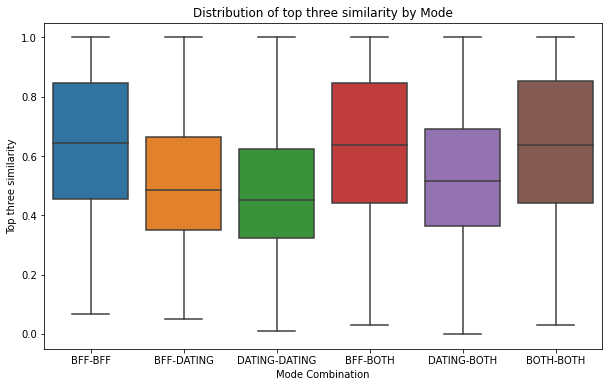

In [231]:
plt.figure(figsize=(10, 6))

sns.boxplot(x='MODE_COMBINATION', y='top_three_avg', data=all_pairs)

# Set labels and title
plt.xlabel('Mode Combination')
plt.ylabel('Top three similarity')
plt.title('Distribution of top three similarity by Mode')

# Display the plot
plt.show()

## Breakdown by Mode and Gender

### Simple Binary Similarity

In [188]:
# Group the dataframe by 'mode_combinations' and 'binary_similarity'
count_by_mode_comb = all_pairs.groupby(['MODE_COMBINATION', 'GENDER_COMBINATION', 'simple_binary_similarity'])['User_ID_1'].count().reset_index()

#total count by gender-pair
gender_total = count_by_mode_comb.groupby(['MODE_COMBINATION', 'GENDER_COMBINATION'])['User_ID_1'].sum()

count_by_mode_comb = count_by_mode_comb.merge(gender_total, on = ['MODE_COMBINATION', 'GENDER_COMBINATION'], how = 'left')

#percentagewise
count_by_mode_comb['percentage'] = (count_by_mode_comb['User_ID_1_x'] / count_by_mode_comb['User_ID_1_y'])

count_by_mode_comb['simple_binary'] = count_by_mode_comb['simple_binary_similarity'].apply(lambda x: 1 if x else 0)

count_by_mode_comb

,MODE_COMBINATION,GENDER_COMBINATION,simple_binary_similarity,User_ID_1_x,User_ID_1_y,percentage,simple_binary
0,BFF-BFF,F-F,False,35665,91378,0.390302,0
1,BFF-BFF,F-F,True,55713,91378,0.609698,1
2,BFF-BFF,F-M,False,13706,30816,0.444769,0
3,BFF-BFF,F-M,True,17110,30816,0.555231,1
4,BFF-BFF,M-M,False,1100,2556,0.430360,0
5,BFF-BFF,M-M,True,1456,2556,0.569640,1
6,BFF-BOTH,F-F,False,46989,120696,0.389317,0
7,BFF-BOTH,F-F,True,73707,120696,0.610683,1
8,BFF-BOTH,F-M,False,51817,113608,0.456103,0
9,BFF-BOTH,F-M,True,61791,113608,0.543897,1


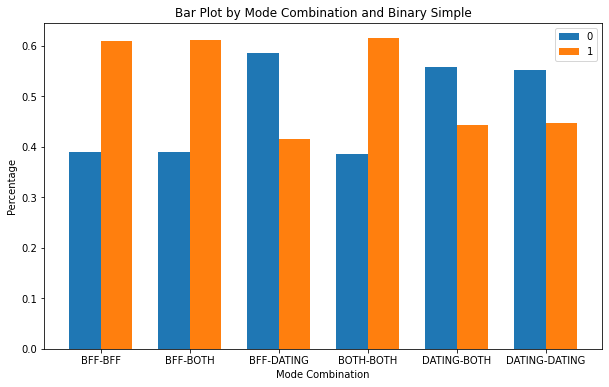

In [189]:
# Assuming you have a DataFrame named 'df' with columns 'GENDER_COMBINATION', 'binary_threshold_embedding_similarity', and 'percentage'
pivoted_df = count_by_mode_comb[count_by_mode_comb['GENDER_COMBINATION'] == 'F-F'].pivot(index='MODE_COMBINATION', columns='simple_binary', values='percentage')

# Extract the categories and values for plotting
categories = pivoted_df.index.tolist()
values_0 = pivoted_df[0].tolist()
values_1 = pivoted_df[1].tolist()

# Plotting
x = np.arange(len(categories))
width = 0.35


fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, values_0, width, label='0')
rects2 = ax.bar(x + width/2, values_1, width, label='1')

ax.set_xlabel('Mode Combination')
ax.set_ylabel('Percentage')
ax.set_title('Bar Plot by Mode Combination and Binary Simple')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

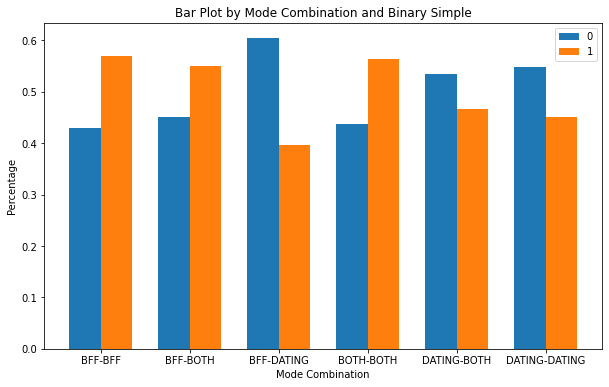

In [190]:
# Assuming you have a DataFrame named 'df' with columns 'GENDER_COMBINATION', 'binary_threshold_embedding_similarity', and 'percentage'
pivoted_df = count_by_mode_comb[count_by_mode_comb['GENDER_COMBINATION'] == 'M-M'].pivot(index='MODE_COMBINATION', columns='simple_binary', values='percentage')

# Extract the categories and values for plotting
categories = pivoted_df.index.tolist()
values_0 = pivoted_df[0].tolist()
values_1 = pivoted_df[1].tolist()

# Plotting
x = np.arange(len(categories))
width = 0.35


fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, values_0, width, label='0')
rects2 = ax.bar(x + width/2, values_1, width, label='1')

ax.set_xlabel('Mode Combination')
ax.set_ylabel('Percentage')
ax.set_title('Bar Plot by Mode Combination and Binary Simple')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

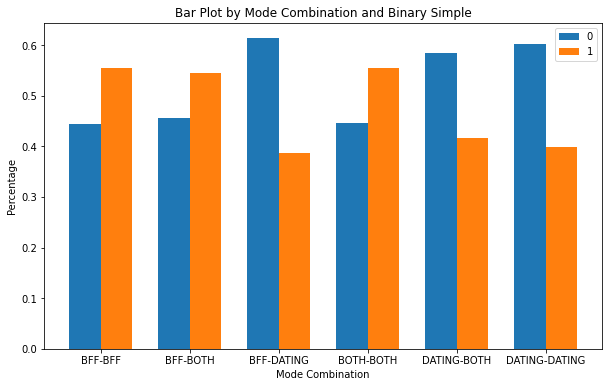

In [191]:
# Assuming you have a DataFrame named 'df' with columns 'GENDER_COMBINATION', 'binary_threshold_embedding_similarity', and 'percentage'
pivoted_df = count_by_mode_comb[count_by_mode_comb['GENDER_COMBINATION'] == 'F-M'].pivot(index='MODE_COMBINATION', columns='simple_binary', values='percentage')

# Extract the categories and values for plotting
categories = pivoted_df.index.tolist()
values_0 = pivoted_df[0].tolist()
values_1 = pivoted_df[1].tolist()

# Plotting
x = np.arange(len(categories))
width = 0.35


fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, values_0, width, label='0')
rects2 = ax.bar(x + width/2, values_1, width, label='1')

ax.set_xlabel('Mode Combination')
ax.set_ylabel('Percentage')
ax.set_title('Bar Plot by Mode Combination and Binary Simple')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

### Simple Threshold Similarity

In [193]:
# Group the dataframe by 'mode_combinations' and 'binary_similarity'
count_by_mode_comb = all_pairs.groupby(['MODE_COMBINATION', 'GENDER_COMBINATION', 'binary_threshold_embedding_similarity'])['User_ID_1'].count().reset_index()

#total count by gender-pair
gender_total = count_by_mode_comb.groupby(['MODE_COMBINATION', 'GENDER_COMBINATION'])['User_ID_1'].sum()

count_by_mode_comb = count_by_mode_comb.merge(gender_total, on = ['MODE_COMBINATION', 'GENDER_COMBINATION'], how = 'left')

#percentagewise
count_by_mode_comb['percentage'] = (count_by_mode_comb['User_ID_1_x'] / count_by_mode_comb['User_ID_1_y'])

count_by_mode_comb

,MODE_COMBINATION,GENDER_COMBINATION,binary_threshold_embedding_similarity,User_ID_1_x,User_ID_1_y,percentage
0,BFF-BFF,F-F,0,27187,91378,0.297522
1,BFF-BFF,F-F,1,64191,91378,0.702478
2,BFF-BFF,F-M,0,10879,30816,0.353031
3,BFF-BFF,F-M,1,19937,30816,0.646969
4,BFF-BFF,M-M,0,840,2556,0.328638
5,BFF-BFF,M-M,1,1716,2556,0.671362
6,BFF-BOTH,F-F,0,35407,120696,0.293357
7,BFF-BOTH,F-F,1,85289,120696,0.706643
8,BFF-BOTH,F-M,0,41650,113608,0.366612
9,BFF-BOTH,F-M,1,71958,113608,0.633388


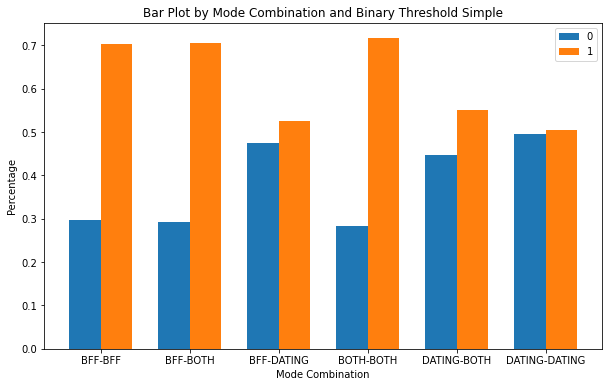

In [194]:
# Assuming you have a DataFrame named 'df' with columns 'GENDER_COMBINATION', 'binary_threshold_embedding_similarity', and 'percentage'
pivoted_df = count_by_mode_comb[count_by_mode_comb['GENDER_COMBINATION'] == 'F-F'].pivot(index='MODE_COMBINATION', columns='binary_threshold_embedding_similarity', values='percentage')

# Extract the categories and values for plotting
categories = pivoted_df.index.tolist()
values_0 = pivoted_df[0].tolist()
values_1 = pivoted_df[1].tolist()

# Plotting
x = np.arange(len(categories))
width = 0.35


fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, values_0, width, label='0')
rects2 = ax.bar(x + width/2, values_1, width, label='1')

ax.set_xlabel('Mode Combination')
ax.set_ylabel('Percentage')
ax.set_title('Bar Plot by Mode Combination and Binary Threshold Simple')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

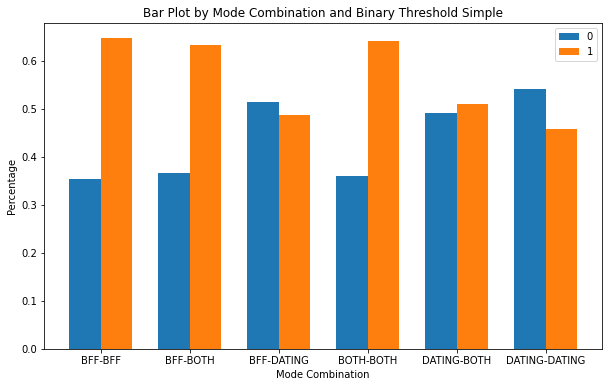

In [196]:
# Assuming you have a DataFrame named 'df' with columns 'GENDER_COMBINATION', 'binary_threshold_embedding_similarity', and 'percentage'
pivoted_df = count_by_mode_comb[count_by_mode_comb['GENDER_COMBINATION'] == 'F-M'].pivot(index='MODE_COMBINATION', columns='binary_threshold_embedding_similarity', values='percentage')

# Extract the categories and values for plotting
categories = pivoted_df.index.tolist()
values_0 = pivoted_df[0].tolist()
values_1 = pivoted_df[1].tolist()

# Plotting
x = np.arange(len(categories))
width = 0.35


fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, values_0, width, label='0')
rects2 = ax.bar(x + width/2, values_1, width, label='1')

ax.set_xlabel('Mode Combination')
ax.set_ylabel('Percentage')
ax.set_title('Bar Plot by Mode Combination and Binary Threshold Simple')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

### Simple Cosine Similarity

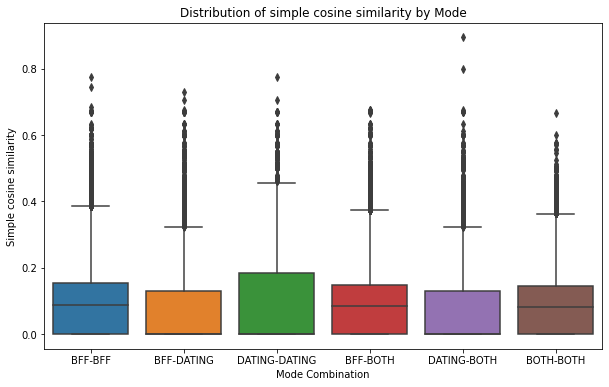

In [201]:
plt.figure(figsize=(10, 6))

sns.boxplot(x='MODE_COMBINATION', y='simple_cosine_similarity', data=all_pairs[all_pairs['GENDER_COMBINATION'] == 'F-F'])

# Set labels and title
plt.xlabel('Mode Combination')
plt.ylabel('Simple cosine similarity')
plt.title('Distribution of simple cosine similarity by Mode')

# Display the plot
plt.show()

In [200]:
all_pairs[(all_pairs['GENDER_COMBINATION'] == 'F-F') & (all_pairs['MODE_COMBINATION'] == 'DATING-DATING')]['simple_cosine_similarity'].describe()

count    17766.000000
mean         0.097091
std          0.124063
min          0.000000
25%          0.000000
50%          0.000000
75%          0.182574
max          0.774597
Name: simple_cosine_similarity, dtype: float64

### Simple Weighted Cosine Similarity

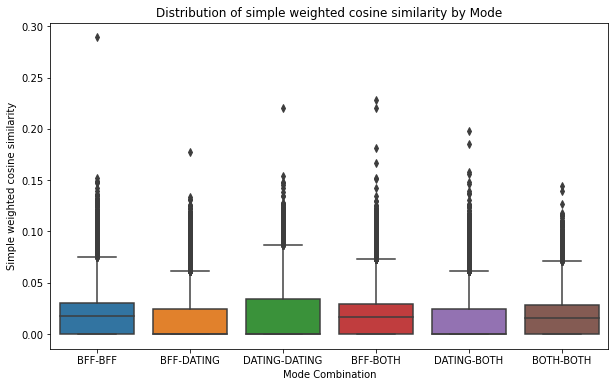

In [203]:
plt.figure(figsize=(10, 6))

sns.boxplot(x='MODE_COMBINATION', y='simple_weighted_cosine_similarity', data=all_pairs[all_pairs['GENDER_COMBINATION'] == 'F-F'])

# Set labels and title
plt.xlabel('Mode Combination')
plt.ylabel('Simple weighted cosine similarity')
plt.title('Distribution of simple weighted cosine similarity by Mode')

# Display the plot
plt.show()

In [204]:
all_pairs[(all_pairs['GENDER_COMBINATION'] == 'F-F') & (all_pairs['MODE_COMBINATION'] == 'DATING-DATING')]['simple_weighted_cosine_similarity'].describe()

count    17766.000000
mean         0.018766
std          0.024332
min          0.000000
25%          0.000000
50%          0.000000
75%          0.034563
max          0.220447
Name: simple_weighted_cosine_similarity, dtype: float64

### Simple Word Embedding Similiarity

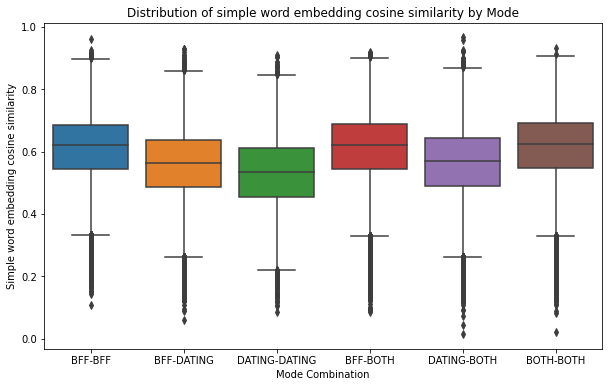

In [206]:
plt.figure(figsize=(10, 6))

sns.boxplot(x='MODE_COMBINATION', y='simple_word_embedding_cosine', data=all_pairs[all_pairs['GENDER_COMBINATION'] == 'F-F'])

# Set labels and title
plt.xlabel('Mode Combination')
plt.ylabel('Simple word embedding cosine similarity')
plt.title('Distribution of simple word embedding cosine similarity by Mode')

# Display the plot
plt.show()

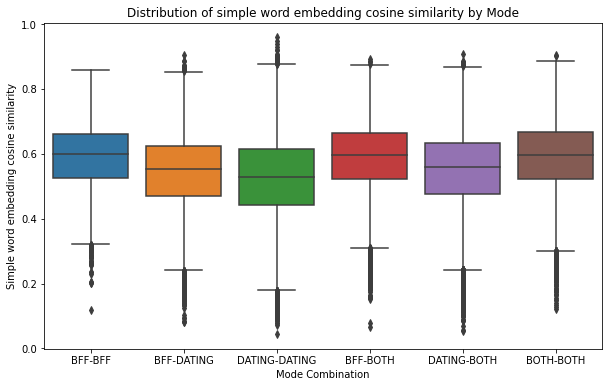

In [207]:
plt.figure(figsize=(10, 6))

sns.boxplot(x='MODE_COMBINATION', y='simple_word_embedding_cosine', data=all_pairs[all_pairs['GENDER_COMBINATION'] == 'M-M'])

# Set labels and title
plt.xlabel('Mode Combination')
plt.ylabel('Simple word embedding cosine similarity')
plt.title('Distribution of simple word embedding cosine similarity by Mode')

# Display the plot
plt.show()

### Cosine Embedding Similarity

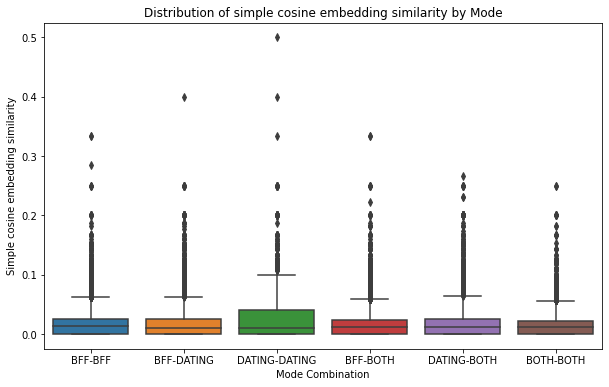

In [209]:
plt.figure(figsize=(10, 6))

sns.boxplot(x='MODE_COMBINATION', y='cosine_embeddings_similarity', data=all_pairs[all_pairs['GENDER_COMBINATION'] == 'F-F'])

# Set labels and title
plt.xlabel('Mode Combination')
plt.ylabel('Simple cosine embedding similarity')
plt.title('Distribution of simple cosine embedding similarity by Mode')

# Display the plot
plt.show()

### Average Similarity

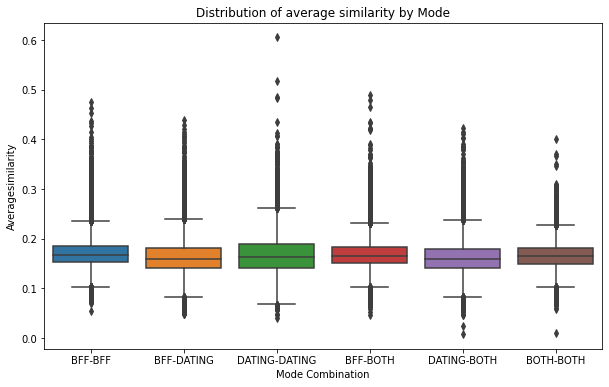

In [210]:
plt.figure(figsize=(10, 6))

sns.boxplot(x='MODE_COMBINATION', y='average_similarity', data=all_pairs[all_pairs['GENDER_COMBINATION'] == 'F-F'])

# Set labels and title
plt.xlabel('Mode Combination')
plt.ylabel('Averagesimilarity')
plt.title('Distribution of average similarity by Mode')

# Display the plot
plt.show()

### Maximum Similarity

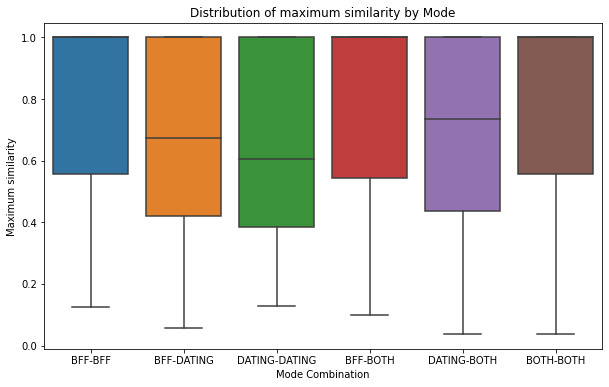

In [212]:
plt.figure(figsize=(10, 6))

sns.boxplot(x='MODE_COMBINATION', y='max_similarity', data=all_pairs[all_pairs['GENDER_COMBINATION'] == 'F-F'])

# Set labels and title
plt.xlabel('Mode Combination')
plt.ylabel('Maximum similarity')
plt.title('Distribution of maximum similarity by Mode')

# Display the plot
plt.show()

In [214]:
all_pairs[(all_pairs['GENDER_COMBINATION'] == 'F-F') & (all_pairs['MODE_COMBINATION'] == 'BFF-BFF')]['max_similarity'].describe()

count    91378.000000
mean         0.811984
std          0.257821
min          0.125671
25%          0.555594
50%          1.000000
75%          1.000000
max          1.000000
Name: max_similarity, dtype: float64

### Top three similarity

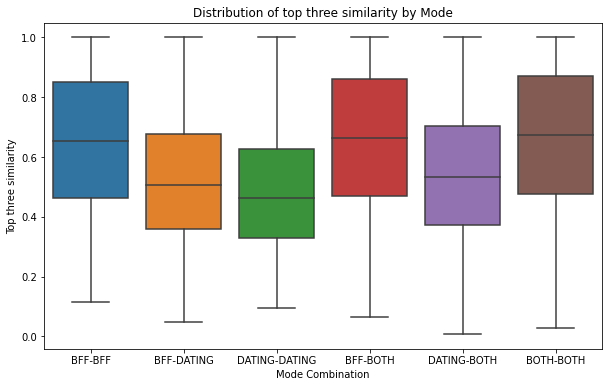

In [232]:
plt.figure(figsize=(10, 6))

sns.boxplot(x='MODE_COMBINATION', y='top_three_avg', data=all_pairs[all_pairs['GENDER_COMBINATION'] == 'F-F'])

# Set labels and title
plt.xlabel('Mode Combination')
plt.ylabel('Top three similarity')
plt.title('Distribution of top three similarity by Mode')

# Display the plot
plt.show()

# Functions

In [19]:
def simple_binary_similarity(interest_set_1, interest_set_2):
    '''
    This functions takes 2 lists and check if there is on overlap in at least one of the elements
    
    Inputs:
    *interest_set_1: the set of interest of user 1 (type:list)
    *interest_set_2: the set of interests of user 2 (type:list)
    
    Output: 
    *True or False (boolean)
    True is returned if there is at least one element in common between the 2 lists
    False if all the elements in the 2 sets are different
    '''
    set1 = set(interest_set_1)
    set2 = set(interest_set_2)
    
    return len(set1.intersection(set2)) > 0

In [20]:
def calculate_cosine_similarity(q_v, d_v):
    '''
    A function that calculates the cosine similarity between 2 word embeddings
    
    Inputs: q_v - word embedding (np.array of size n)
            d_v - word embedding (np.array of size n)
    Output: 
            cos_sim - the cosine similarity between the 2 embeddings (int)
    '''
    cos_sim = np.dot(q_v, d_v) / (np.linalg.norm(q_v)*np.linalg.norm(d_v))
    
    
    return cos_sim

In [21]:
def pairwise_cosine_similarity(set_avg_embedding_1, set_avg_embedding_2, interest_set_1, interest_set_2):
    '''
    A function that takes in as inputs 2 sets of word embeddings and for each of the
    word embedding pairs from the 2 sets, it calculates the cosine similarity
    
    Inputs: set_avg_embedding_1 - a set of word embeddings (type: list)
            set_avg_embedding_1 = a set of word embeddings (type: list)
            
    Output: 
            pair_cosine - a list of the cosine similarity between each of the word embedding
            pairs from the 2 sets (type: list)
    
    '''
    
    pair_cosine = []
    pairs = []
    
    for i in range(len(set_avg_embedding_1)):
        
        for j in range(len(set_avg_embedding_2)):
            
            pair_cosine.append(calculate_cosine_similarity(set_avg_embedding_1[i], set_avg_embedding_2[j])) #calculate the cosine similarity between a pair of word embeddings
            pairs.append([interest_set_1[i],interest_set_2[j]])
    
    return pair_cosine, pairs

In [22]:
def binary_embedding_similarity(pair_cosine, interest_pairs):
    '''
    This function calculates the binary cosine similarity for a set of word embeddings
    If any pair of word embeddings have a cosine similarity which is larger than a certain 
    threshold, then we assign a similarity of 1, otherwise we assign a similiarity of 0
    
    Inputs: pair_cosine - the cosine similarity score of all the pairs of word embeddings (type: list)
            interest_pairs - a list with all the interest pairs (type: list)
    
    Output: 1 if at least one set of pairs is above a certain threshold
            0 otherwise
    '''
    
    for i in range(len(pair_cosine)): 
        
        if pair_cosine[i] >= 0.6: #think of what is a good threshold for this
            
            #print(pairs[i])
            return 1
    
    return 0

In [23]:
def simple_cosine_similarity(interest_set_1, interest_set_2):
    '''
    This funtion calculates the simple cosine similarity between 2 input sets of interests
    
    Inputs:
    *interest_set_1: the set of interest of user 1 (type:list)
    *interest_set_2: the set of interests of user 2 (type:list)
    
    Output:
    *cosine similarity score (type: int)
    '''
    
    set1 = set(interest_set_1)
    set2 = set(interest_set_2)
    
    l_u = len(interest_set_1) #number of interests of user u
    l_v = len(interest_set_2) #number of interests of user v
    
    l_uv = len(set1.intersection(set2)) #number of shared interests between user u and user v
    
    #calculate cosine similarity
    cos_sim = l_uv/(np.sqrt(l_u)*np.sqrt(l_v))
    
    return cos_sim

In [24]:
def simple_weighted_cosine_similarity(interest_set_1, interest_set_2, interest_dict):
    '''
    This function calcluates the weighted cosine similarity between 2 sets of interests where the
    weight of shared interests is defined as w = 1/log(N) where N is the frequency of occurance of the 
    interest
    
    Inputs:
    *interest_set_1: the set of interest of user 1 (type:list)
    *interest_set_2: the set of interests of user 2 (type:list)
    *interest_dict: a dictionary which contains the interest_id as the key, and the occurance
    frequency as the value
    
    Output:
    *weighted_cos_sim : weighted cosine similarity score (type: int)
    
    '''
    set1 = set(interest_set_1)
    set2 = set(interest_set_2)
    
    l_u = len(interest_set_1) #number of interests of user u
    l_v = len(interest_set_2) #number of interests of user v
    
    intersection = set1.intersection(set2)
    
    sum_w = 0
    
    for i in intersection:
        w = 1/np.log(interest_dict[i])
        sum_w += w
        
    
    weighted_cos_sim = sum_w / (np.sqrt(l_u)*np.sqrt(l_v))
    
    return weighted_cos_sim

In [25]:
def calculate_cosine_similarity(q_v, d_v):
    '''
    A function that calculates the cosine similarity between 2 word embeddings
    
    Inputs: q_v - word embedding (np.array of size n)
            d_v - word embedding (np.array of size n)
    Output: 
            cos_sim - the cosine similarity between the 2 embeddings (int)
    '''
    cos_sim = np.dot(q_v, d_v) / (np.linalg.norm(q_v)*np.linalg.norm(d_v))
    
    return cos_sim

In [26]:
def cosine_embeddings_similarity(interest_set_1, interest_set_2, pair_cosine, interest_pairs):
    '''
    This function calclutates the cosine similarity between 2 sets of interests based on the word embeddings
    The denominator is the product of the number of interests in each set
    The nominator is the number of shared interests between the 2 sets. Interests are considered to be the same if
    the cosine similarity between the interets' word embedding are above a certain threshold
    
    Inputs: interest_set_1: the set of interest of user 1 (type:list)
            interest_set_2: the set of interests of user 2 (type:list)
            pair_cosine - the cosine similarity score of all the pairs of word embeddings (type: list)
            interest_pairs - a list with all the interest pairs (type: list)
            
    Output: cos_sim - the cosine similarity score between the 2 sets of interests (type: int)
    
    '''
    
    #count number of shared interest 
    l_uv = 0
    
    for i in range(len(pair_cosine)):
        
        if pair_cosine[i] >= 0.6:
            l_uv += 1 #think about what is a good threshold
        
    
    l_u = len(interest_set_1) #number of interests of user u
    l_v = len(interest_set_2) #number of interests of user v
    
    
    #calculate cosine similarity
    cos_sim = l_uv/(len(interest_set_1) * len(interest_set_2))
    
    return cos_sim

In [27]:
def pairwise_similarity(pair_cosine, interest_pairs):
    '''
    This function calcultes a similarity score between 2 sets of word embeddings by
    calcualting each pair's cosine similarity score and taking the average of that score
    
    Inputs: pair_cosine - the cosine similarity score of all the pairs of word embeddings (type: list)
            interest_pairs - a list with all the interest pairs (type: list)
            
    
    Output: average_cosine - the average cosine similarity score of all the pairs of word
            embeddings (type: int)
    
    '''
    
    #find the average cosine similarity
    average_cosine = sum(pair_cosine) / len(pair_cosine)
    
    return average_cosine

In [28]:
def max_similarity(pair_cosine, interest_pairs):
    '''
    This function calcultes a similarity score between 2 sets of word embeddings by
    calcualting each pair's cosine similarity score and taking the maximum cosine similarity score
    from all the pairs as the similarity score betweent the 2 interest sets
    
    Inputs: pair_cosine - the cosine similarity score of all the pairs of word embeddings (type: list)
            interest_pairs - a list with all the interest pairs (type: list)
            
    
    Output: max_cosine - the maximum cosine similarity score of all the pairs of word
            embeddings (type: int)
    
    '''
    
    #find the maximum cosine similarity
    max_cosine = max(pair_cosine)
    
    return max_cosine

In [29]:
def top_three_similarity(pair_cosine, interest_pairs):
    '''
    This function calcultes a similarity score between 2 sets of word embeddings by
    calcualting each pair's cosine similarity score and taking the average of the top three cosine similarity scores
    from all the pairs as the similarity score betweent the 2 interest sets
    
    Inputs: pair_cosine - the cosine similarity score of all the pairs of word embeddings (type: list)
            interest_pairs - a list with all the interest pairs (type: list)
            
    
    Output: avg_top_three - the average cosine similarity score of the top three pairs based on their similarity score
    
    '''
    
    sorted_list = sorted(pair_cosine, reverse=True)
    top_three_max = sorted_list[:3]
    avg_top_three = sum(top_three_max) / len(top_three_max)
    
    
    return avg_top_three

# Some Tests

## Binary similatiry with embedding threshold

Some examples of how the binary similarity with a threshold on the embeddings cosine similarity works

In [124]:
len(all_pairs['set_avg_embedding_1'][0])

5

In [125]:
len(all_pairs['set_avg_embedding_1'][1])

5

In [163]:
binary_embedding_similarity(all_pairs['set_avg_embedding_1'][6], all_pairs['set_avg_embedding_2'][6], all_pairs['set_interests_1'][6], all_pairs['set_interests_2'][6])

[1301, 1302]


1

In [165]:
interest_count[interest_count['INTEREST_ID'] == 1301]

,level_0,INTEREST_ID,INTEREST_NAME_x,OCCURENCE_FREQUENCY,OCCURANCE_PERCENTAGE,RANKING,index,tokenized_interest,avg_embedding,check_embd,mask
9,10,1301,Dogs,118,1.666431,11,3,[dogs],"[-0.0205078125, -0.012451171875, -0.1279296875...",False,False


In [166]:
interest_count[interest_count['INTEREST_ID'] == 1302]

,level_0,INTEREST_ID,INTEREST_NAME_x,OCCURENCE_FREQUENCY,OCCURANCE_PERCENTAGE,RANKING,index,tokenized_interest,avg_embedding,check_embd,mask
39,40,1302,Cats,47,0.663748,41,47,[cats],"[-0.0703125, 0.2578125, -0.291015625, 0.161132...",False,False


In [167]:
binary_embedding_similarity(all_pairs['set_avg_embedding_1'][16], all_pairs['set_avg_embedding_2'][16], all_pairs['set_interests_1'][16], all_pairs['set_interests_2'][16])

[1414, 1418]


1

In [168]:
interest_count[interest_count['INTEREST_ID'] == 1414]

,level_0,INTEREST_ID,INTEREST_NAME_x,OCCURENCE_FREQUENCY,OCCURANCE_PERCENTAGE,RANKING,index,tokenized_interest,avg_embedding,check_embd,mask
37,38,1414,Sense of humour,50,0.706115,39,4,"[sense, of, humour]","[0.10546875, 0.002166748046875, -0.07161458333...",False,False


In [169]:
interest_count[interest_count['INTEREST_ID'] == 1418]

,level_0,INTEREST_ID,INTEREST_NAME_x,OCCURENCE_FREQUENCY,OCCURANCE_PERCENTAGE,RANKING,index,tokenized_interest,avg_embedding,check_embd,mask
72,73,1418,Sense of adventure,24,0.338935,74,105,"[sense, of, adventure]","[0.17220052083333334, -0.004384358723958333, -...",False,False


In [174]:
binary_embedding_similarity(all_pairs['set_avg_embedding_1'][499344], all_pairs['set_avg_embedding_2'][499344], all_pairs['set_interests_1'][499344], all_pairs['set_interests_2'][499344])

[602, 601]


1

In [175]:
interest_count[interest_count['INTEREST_ID'] == 601]

,level_0,INTEREST_ID,INTEREST_NAME_x,OCCURENCE_FREQUENCY,OCCURANCE_PERCENTAGE,RANKING,index,tokenized_interest,avg_embedding,check_embd,mask
16,17,601,Video games,101,1.426352,18,1,"[video, games]","[0.03839111328125, 0.1095428466796875, -0.0496...",False,False


In [176]:
interest_count[interest_count['INTEREST_ID'] == 602]

,level_0,INTEREST_ID,INTEREST_NAME_x,OCCURENCE_FREQUENCY,OCCURANCE_PERCENTAGE,RANKING,index,tokenized_interest,avg_embedding,check_embd,mask
24,25,602,Board games,71,1.002683,26,21,"[board, games]","[-0.022705078125, -0.01806640625, -0.007663726...",False,False
